<h1> Lab 3: Reducing Crime</h1>

<h3> Ammara Essa, Curtis Lin, and David Wheeler </h3>
      

## Table of Contents: <a class="anchor" id="toc-q"></a>
* [Objectives](#first-q)
* [Hypotheses](#second-q)
* [Sampling regime](#third-q)
* [Open data](#fourth-q)
* [Curate data](#fifth-q)
* [Summary statistics and prelimary sanity checks](#sixth-q)
* [Exploratory data analyses](#seventh-q)
* [Diagnostics](#eighth-q)
* [Inferential Analyses](#ninth-q)
* [Interpretation](#tenth-q)
* [Resources](#eleventh-q)
* [Appendix](#twelvth-q)

### Objectives <a class="anchor" id="first-q"></a>  
[Back to Table of Contents](#toc-q)

**Introduction and motivation**
* Public safety is a major concern for constituents and elected officials alike, especially during elections. By identifying determinants of crime in North Carolina, we can develop policy suggestions to help the campaign deliver on the promise of reducing crime rates, which can in turn bolster their public support. Specifically, we want to understand if crime rates are explained best by geographic, demographic, economic, criminal history variables or a combination of such variables. 

**Help the North Carolina polictical campaign understand the determinants of crime.**
   * Aim for causal estimates of the determinants of crime & clearly explain how omitted variables may affect conclusions.
   
**Generate policy suggestions that are applicable to local government.**

**For Draft 1:**

**1. What do you want to measure? Make sure you identify variables that will be relevant to the concerns of the political campaign.**
    
   * For the response variable, we want to identify the determinants of crime (construct), here expressed with the measured variable $crmrte$. For the explanatory variables, we propose to use variables associated with:
        * geography (e.g. $county$, $west$, and $central$) since crime is often associated with place (see David Weisburd's work) & resultant models could be used to inform policies for specific locales. 
        * demographics (e.g. $polpc$, $density$, and $pctymle$) since crime is often associated with demographics & resultant models could be used to help demographics of interest reduce crime.
        * economics (e.g. $wcon$, $wtuc$, and $wtrd$) since wages could conceivably be associated with crime rates & resultant models could be used to justify wage change policies to reduce crime rates.
        * probabilities to be arrested, be convicted, and prison sentence lengths (e.g. $prbarr$, $prbconv$, and $avgsen$) since crimes are often commited by repeat offenders and & resultant models could be used to justify policy changes in prison systems.

**2. What covariates help you identify a causal effect? What covariates are problematic, either due to multicollinearity, or because they will absorb some of a causal effect you want to measure?**
* We propose to that variables related to geography (e.g. $west$, $central$,etc...), demography (e.g. $density$,$polpc$, etc... ), economics (e.g. $taxpc$,$fed$, etc... ), and criminal history (e.g. $prbarr$, $prconv$, etc... ) might help us idenitfy highly associated, and perhaps $causal$, determinants of crime.
* While there is some mulitcollinearity, for example among the wage variables, it is far from perfect multicollinearity- thus multicollinearity will likely not cause dramtic problems herein.
* The intercepts, $\beta_0$, will also be critical to absorb some of the variation from omitted variables that cause crime rates to vary.

**3. What transformations should you apply to each variable? This is very important because transformations can reveal linearities in the data, make our results relevant, or help us meet model assumptions.**
* The response variable $crmrte$ and all continuous explainatory variables were log-transformed to reveal a roughly linear relationships with $crmrte$. Categorical variables, such as $west$, $central$, etc... were not log-transformed.
* Additionally, these transformations revealed a roughly linear relationship between $mix$ and $prbarr$ which was be used as justfication to remove the former from the models and simplify future analyses.


**4. Are your choices supported by EDA? You will likely start with some general EDA to detect anomalies (missing values, top-coded variables, etc.). From then on, your EDA should be interspersed with your model building. Use visual tools to guide your decisions.**

$\star$ Yes, the 2D and 3D scatterplot matrices presented below illustrate our choices and transformations of covariates. For example, $crmte$ is related to $density$ but only after log-transformed.

### Hypotheses <a class="anchor" id="second-q"></a>  
[Back to Table of Contents](#toc-q)

### Sampling regime<a class="anchor" id="third-q"></a>  
[Back to Table of Contents](#toc-q)

### Open data<a class="anchor" id="fourth-q"></a>  
[Back to Table of Contents](#toc-q)

**Install and invoke packages**

In [1]:
install.packages("PerformaceAnalytics",
                 lib='/Users/davidwheeler/anaconda3/lib/R/library',
                repos='http://cran.rstudio.com/')

Warning message:
“package ‘PerformaceAnalytics’ is not available (for R version 3.5.1)”

In [29]:
library(car)
library(stargazer)
library(GGally)
library(scatterplot3d)
#library(PerformanceAnalytics)

Loading required package: carData

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: ggplot2


**Open data**

In [1]:
df = read.csv("crime_v2.csv",header=T)

### Curate data<a class="anchor" id="fifth-q"></a>  
[Back to Table of Contents](#toc-q)

In [2]:
str(df)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [3]:
summary(df)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

Convert $county,\;west,\;central,$ and $ urban$ from numerics to factors

In [7]:
df$county= factor(df$county)
df$west= factor(df$west)
df$central= factor(df$central)
df$urban= factor(df$urban)

Convert $prbconv$ from factor to numeric

In [8]:
df$prbconv = as.numeric(as.character(df$prbconv))

Locate missing values, NAs

In [9]:
apply(is.na(df), 2, which) 

county year crmrte prbarr prbconv prbpris avgsen polpc density taxpc ⋯
[1,] 92     92   92     92     92      92      92     92    92      92    ⋯
[2,] 93     93   93     93     93      93      93     93    93      93    ⋯
[3,] 94     94   94     94     94      94      94     94    94      94    ⋯
[4,] 95     95   95     95     95      95      95     95    95      95    ⋯
[5,] 96     96   96     96     96      96      96     96    96      96    ⋯
[6,] 97     97   97     97     97      97      97     97    97      97    ⋯
     wtuc wtrd wfir wser wmfg wfed wsta wloc mix pctymle
[1,] 92   92   92   92   92   92   92   92   92  92     
[2,] 93   93   93   93   93   93   93   93   93  93     
[3,] 94   94   94   94   94   94   94   94   94  94     
[4,] 95   95   95   95   95   95   95   95   95  95     
[5,] 96   96   96   96   96   96   96   96   96  96     
[6,] 97   97   97   97   97   97   97   97   97  97

Remove:
   * missing values
   * the $year$ variable - it is a constant
   * instances of $prbarr$ & $prconv$ that are > 1 since probabilities, $p$, 0 $\leq\; p \leq 1$.

In [10]:
df <- na.omit(df)

In [11]:
df$year = NULL

$prconv$ has 10 cases with $p$ > 1

In [12]:
summary(df$prbconv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34541 0.45283 0.55128 0.58886 2.12121 

$prbarr$ has 1 case with $p$ > 1

In [13]:
summary(df$prbarr)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20568 0.27095 0.29492 0.34438 1.09091 

Remove rows with $prbarr$ and $prbconv$ > 1

In [14]:
crime.narm <- df[which(df$prbarr < 1),]
crime.narm <- df[which(df$prbconv < 1),]

Them dimensions of the final dataframe

In [15]:
dim(crime.narm)

[1] 81 24

### Summary statistics & preliminary sanity checks<a class="anchor" id="sixth-q"></a>  
[Back to Table of Contents](#toc-q)

### Exploratory data analyses<a class="anchor" id="seventh-q"></a>  
[Back to Table of Contents](#toc-q)

Crime and geography

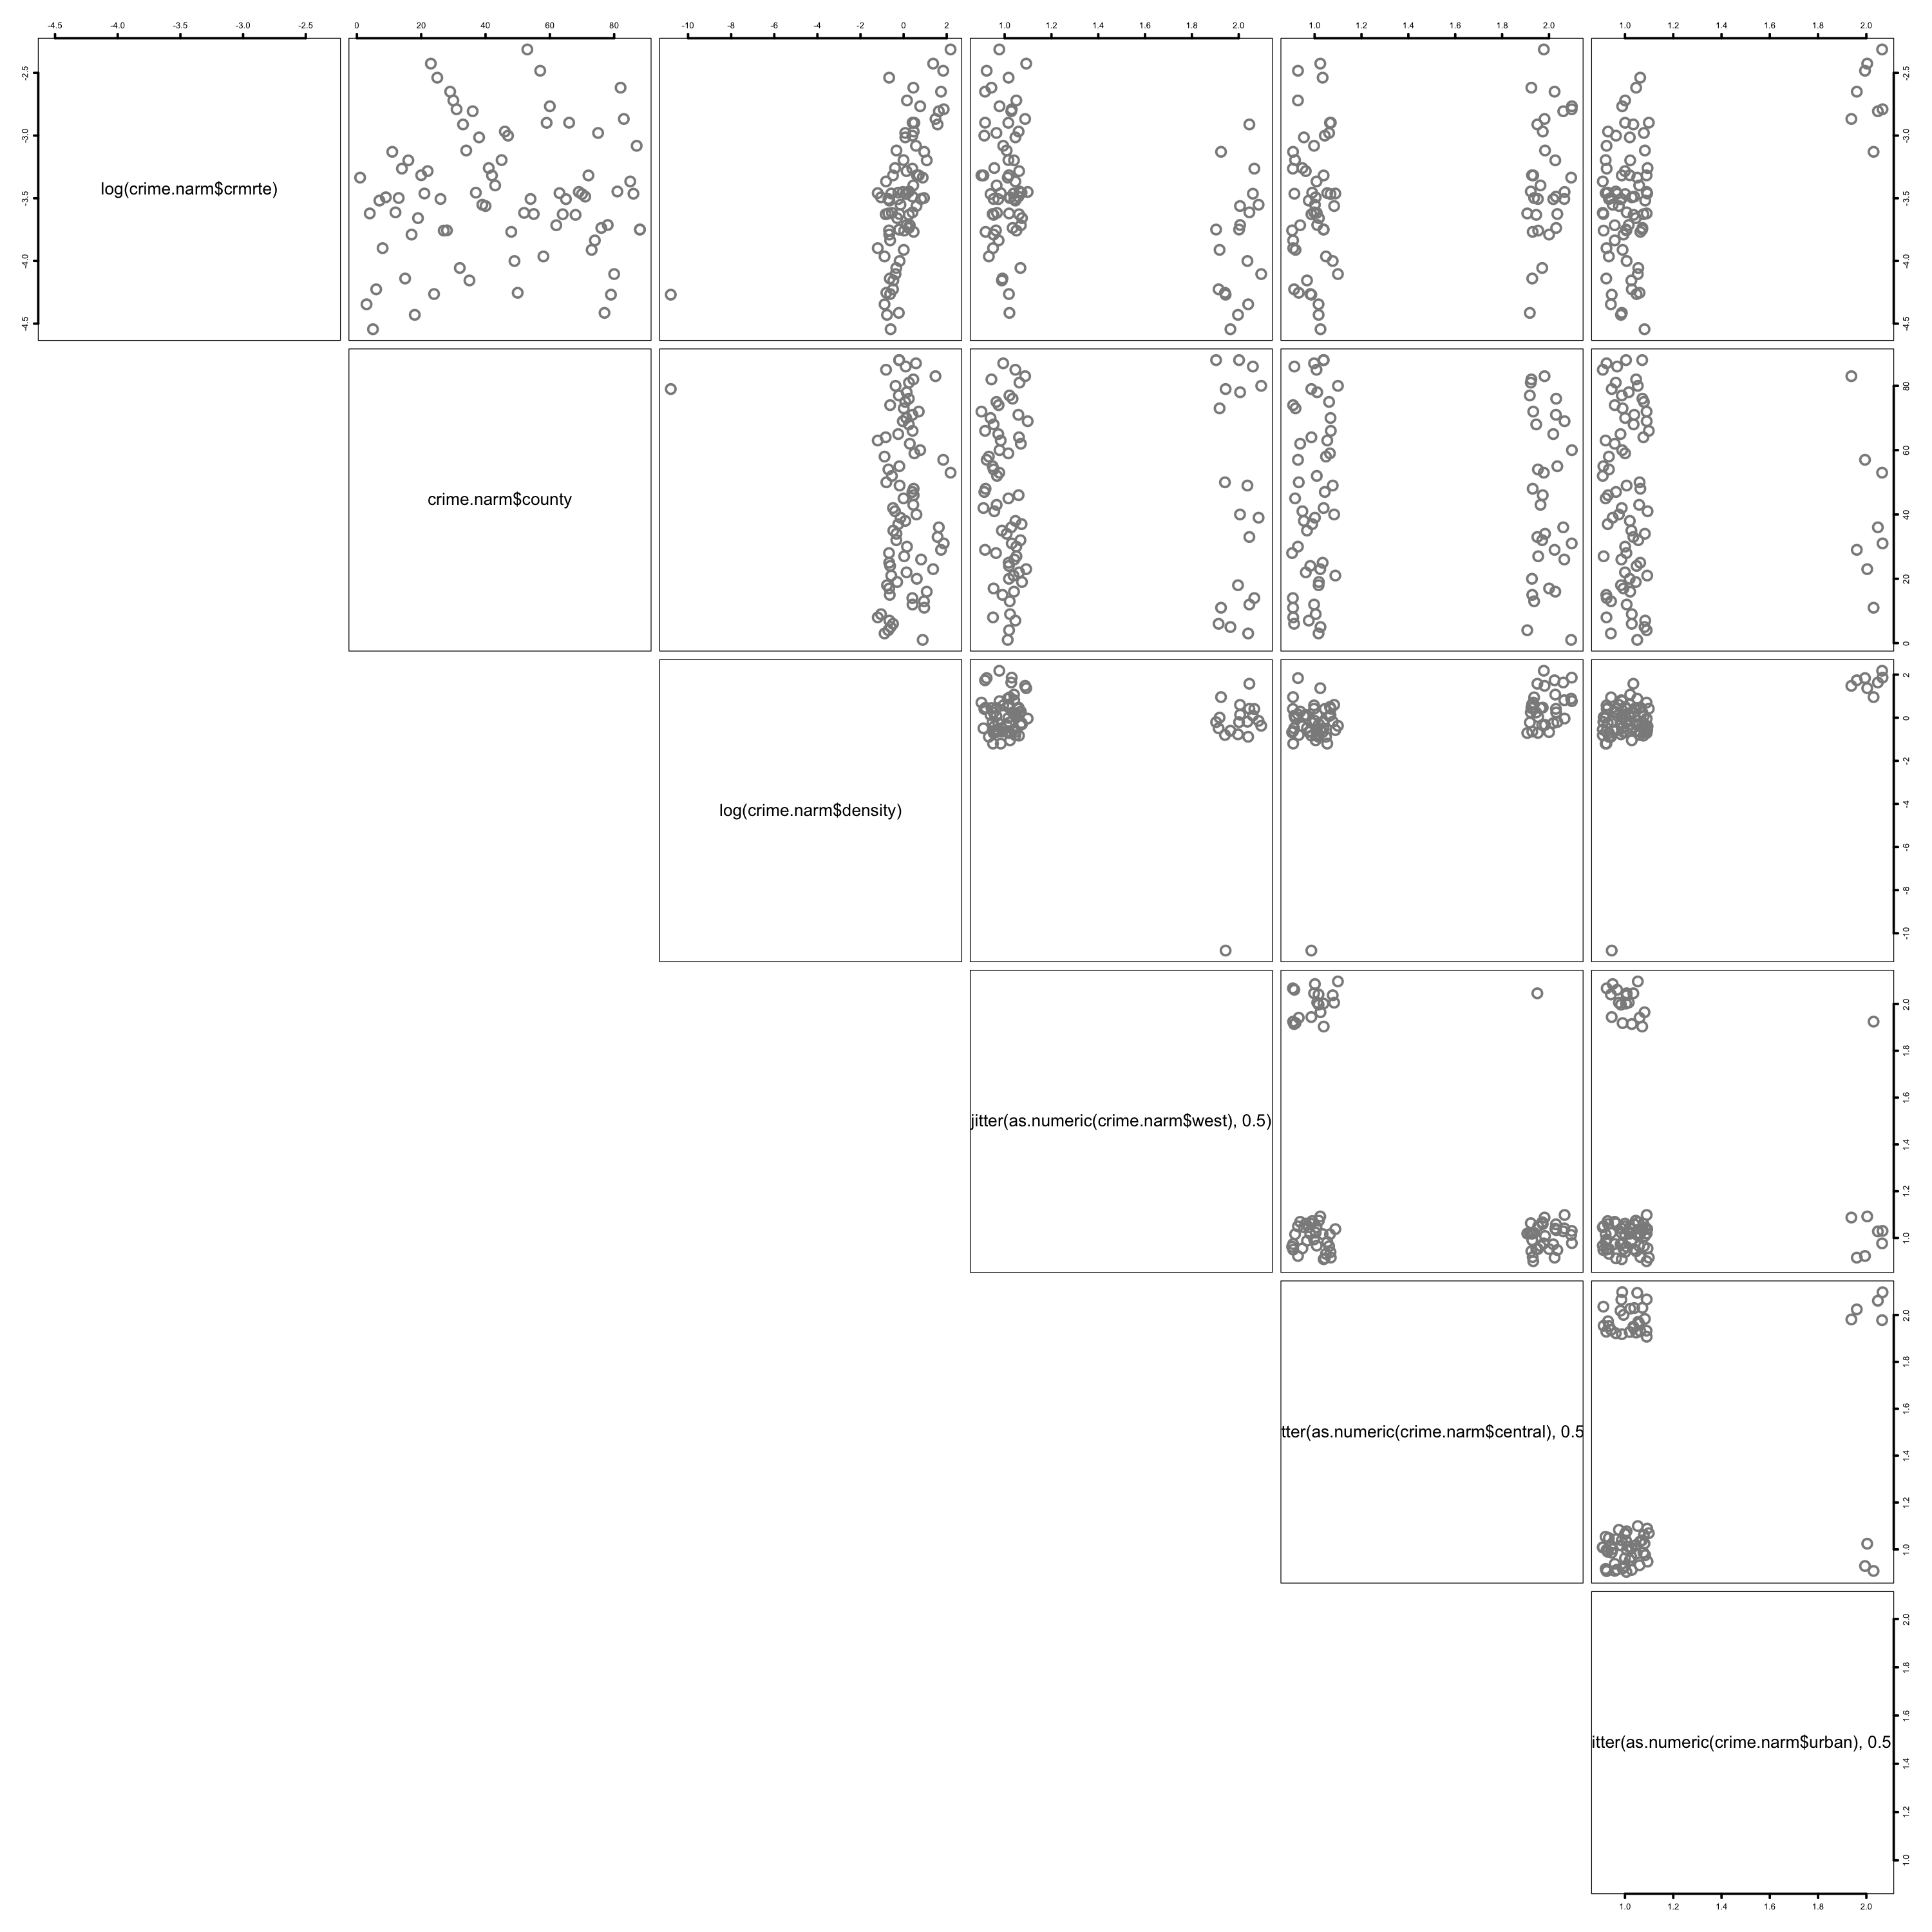

In [22]:
pairs(~log(crime.narm$crmrte)
      + crime.narm$county
      + log(crime.narm$density)
      + jitter(as.numeric(crime.narm$west),0.5)
      + jitter(as.numeric(crime.narm$central),0.5)
      + jitter(as.numeric(crime.narm$urban),0.5),
      cex.labels=2, lower.panel = NULL,
      pch=1,cex=3,lwd=3,col="grey55")
options(repr.plot.height = 25, repr.plot.width = 25, repr.plot.pointsize = 10)

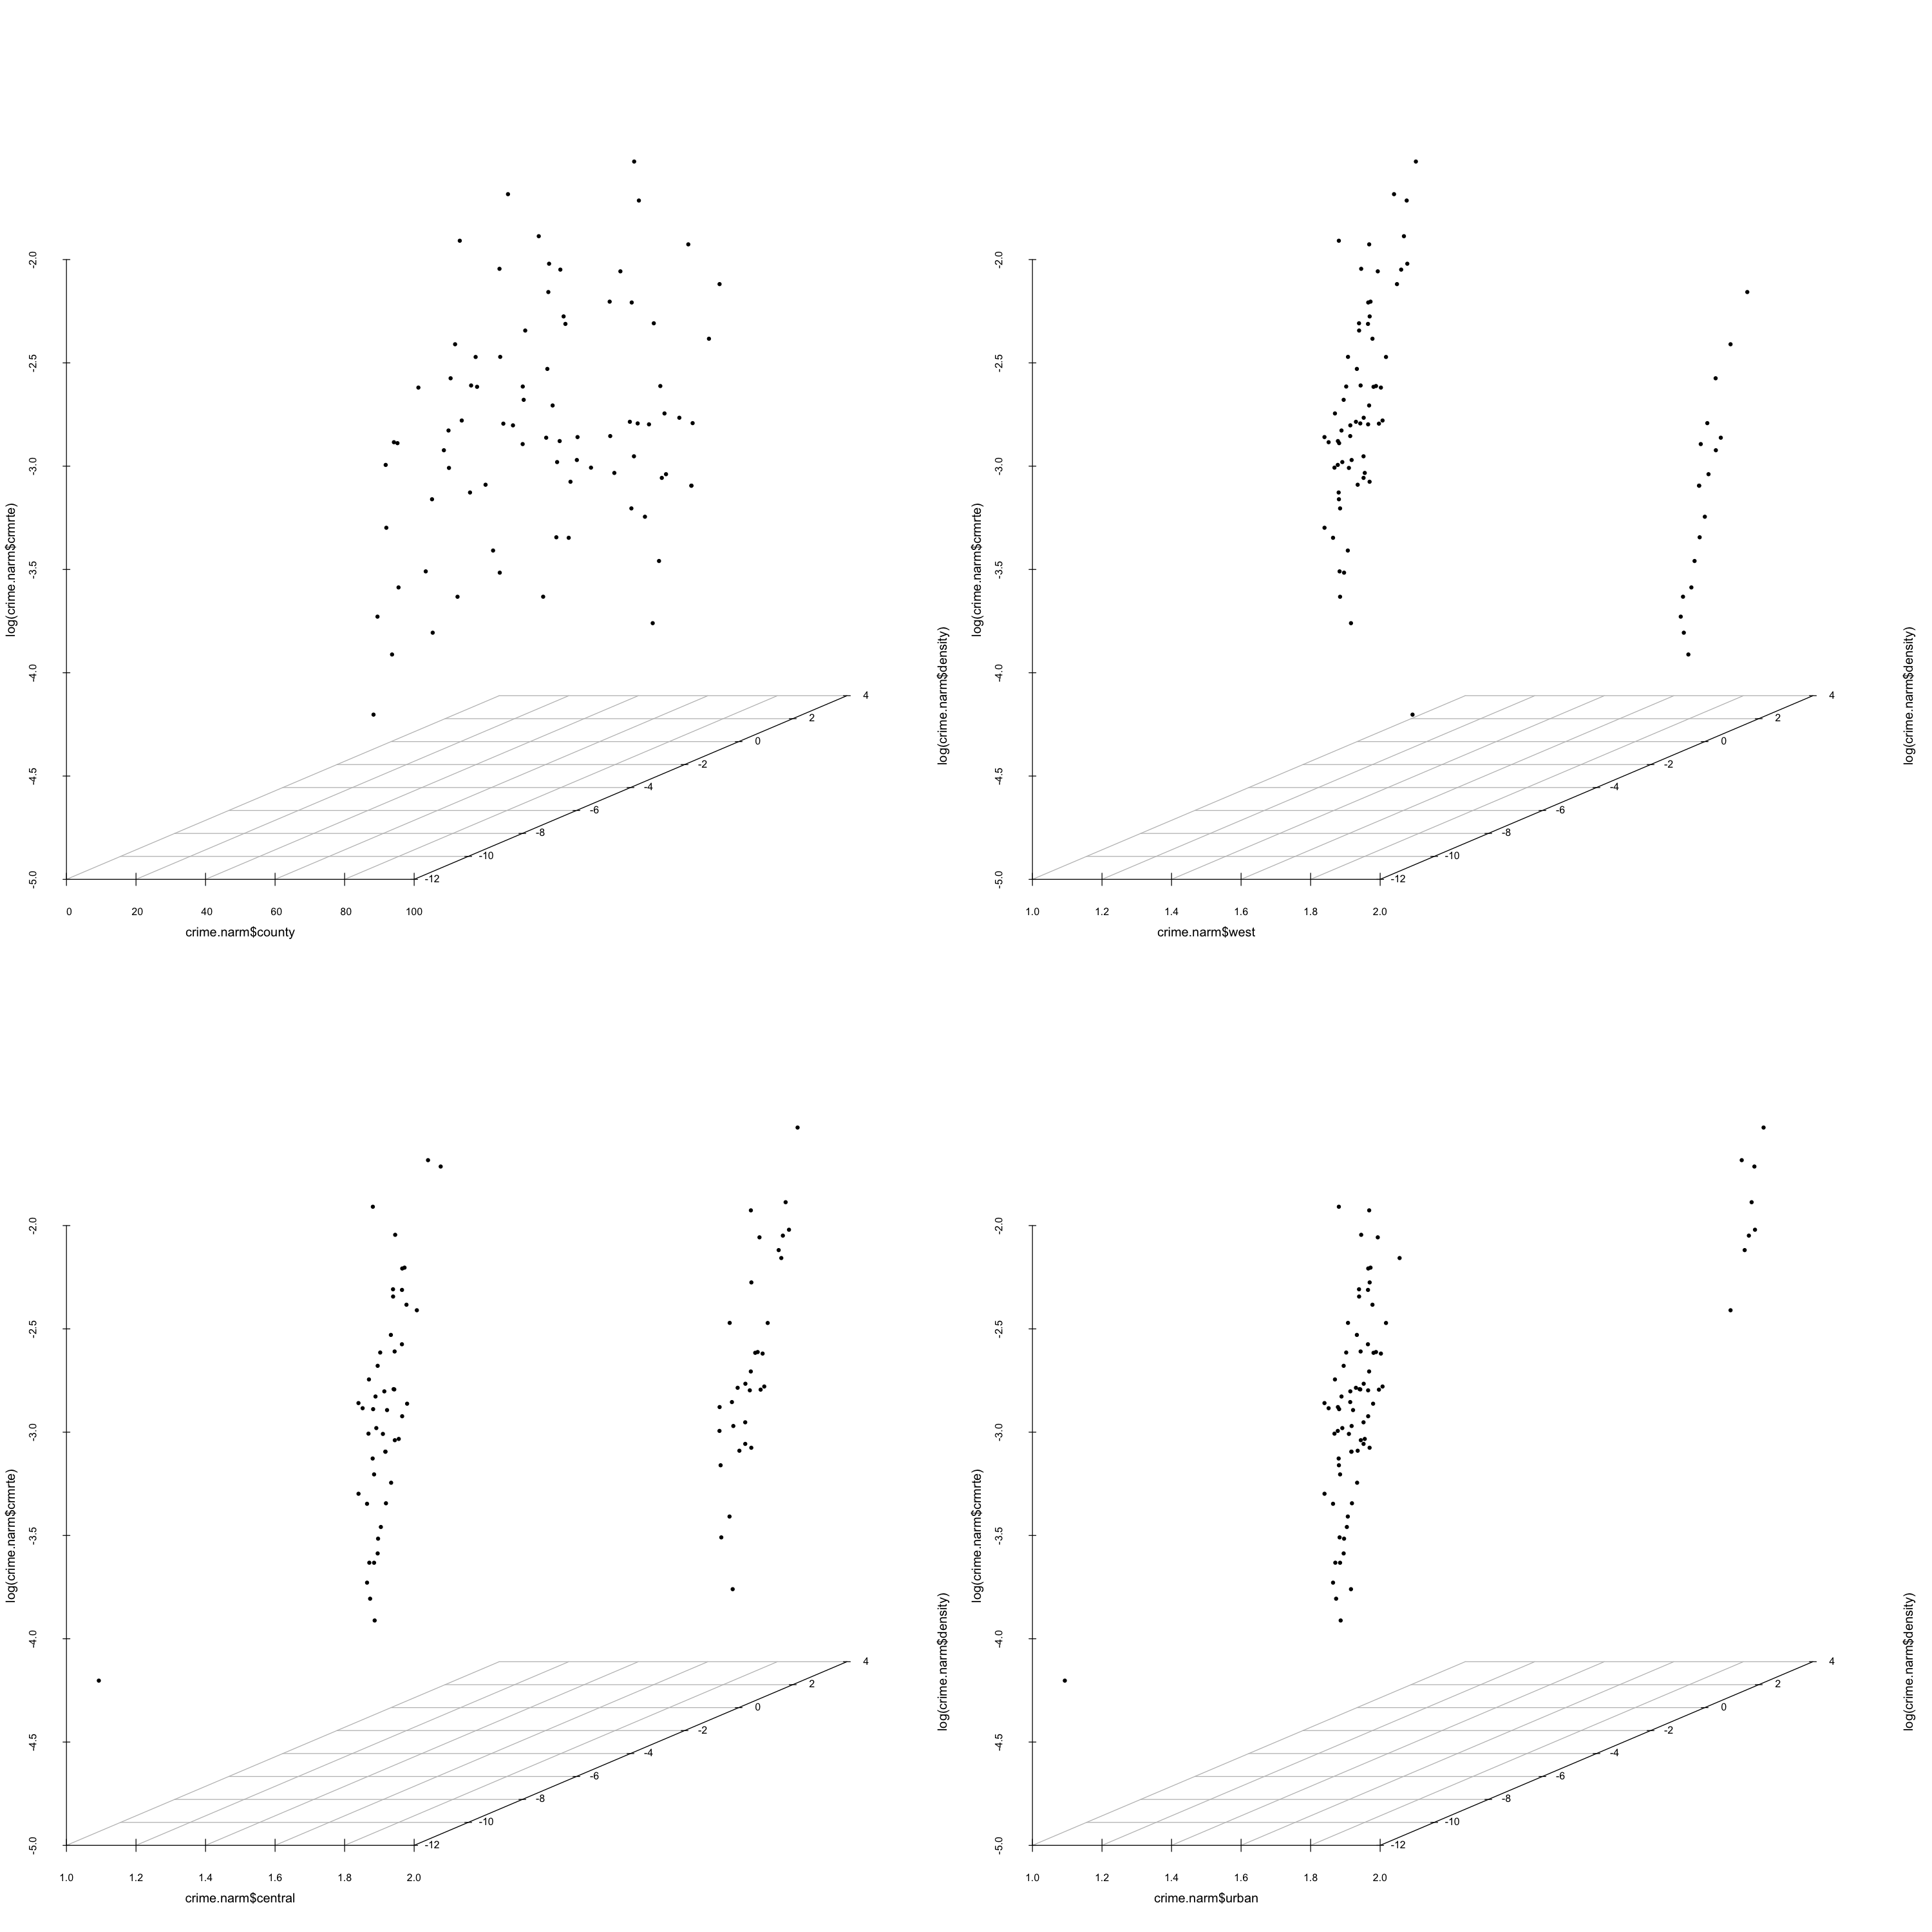

In [14]:
par(mfrow=c(2,2))
scatterplot3d(crime.narm$county,
              log(crime.narm$density),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(crime.narm$west,
              log(crime.narm$density),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(crime.narm$central,
              log(crime.narm$density),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(crime.narm$urban,
              log(crime.narm$density),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
options(repr.plot.height = 6, repr.plot.width = 8, repr.plot.pointsize = 10)

Crime and demographics

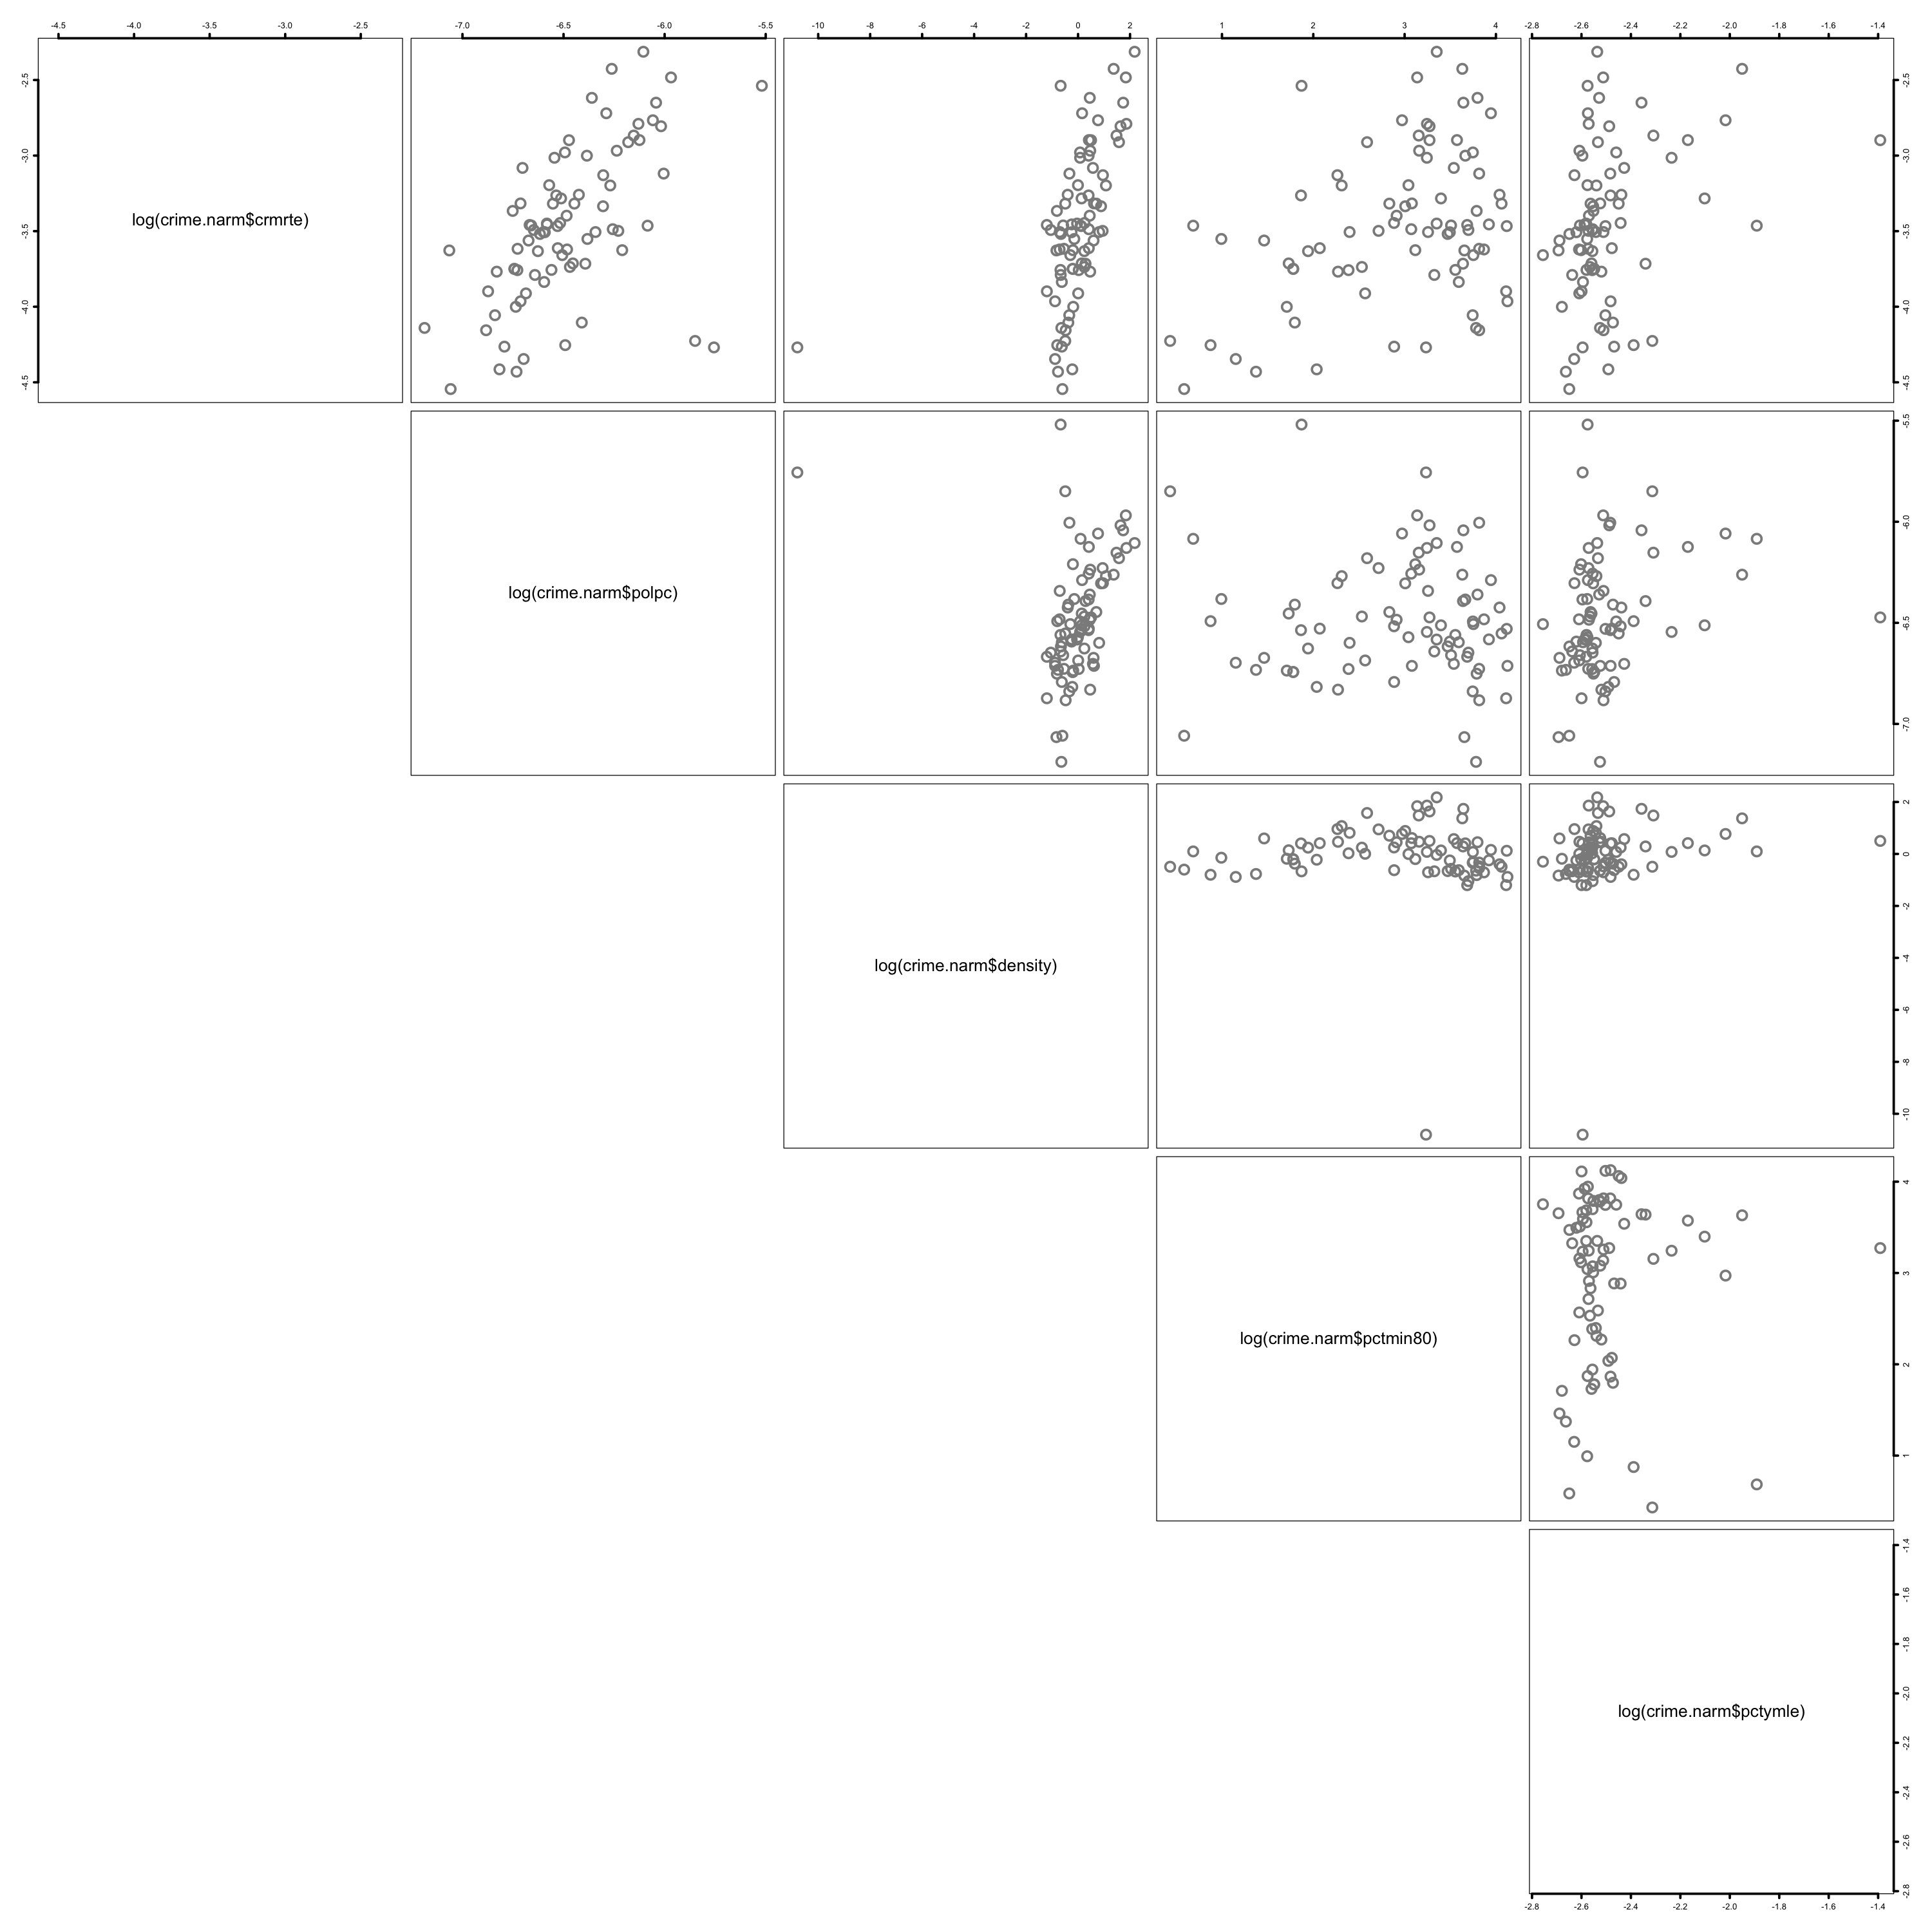

In [20]:
pairs(~log(crime.narm$crmrte)
      + log(crime.narm$polpc)
      + log(crime.narm$density)
      + log(crime.narm$pctmin80)
      + log(crime.narm$pctymle),
      cex.labels=2, lower.panel = NULL,
      pch=1,cex=3,lwd=3,col="grey55")
options(repr.plot.height = 25, repr.plot.width = 25, repr.plot.pointsize = 10)

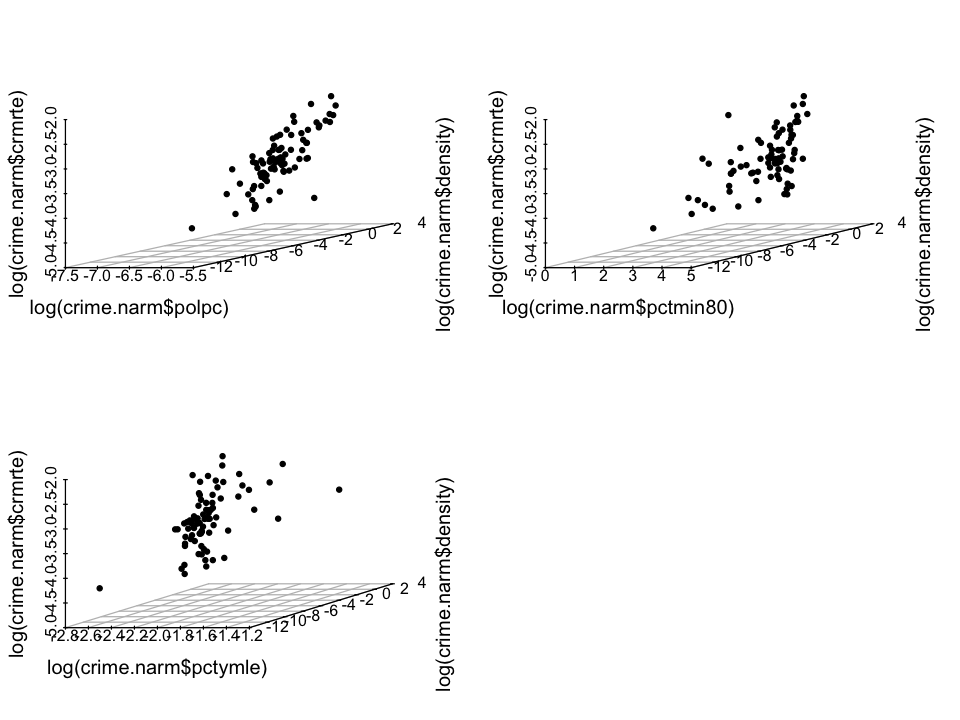

In [16]:
par(mfrow=c(2,2))
scatterplot3d(log(crime.narm$polpc),
              log(crime.narm$density),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(log(crime.narm$pctmin80),
              log(crime.narm$density),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(log(crime.narm$pctymle),
              log(crime.narm$density),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
options(repr.plot.height = 6, repr.plot.width = 8, repr.plot.pointsize = 10)

Crime and economics

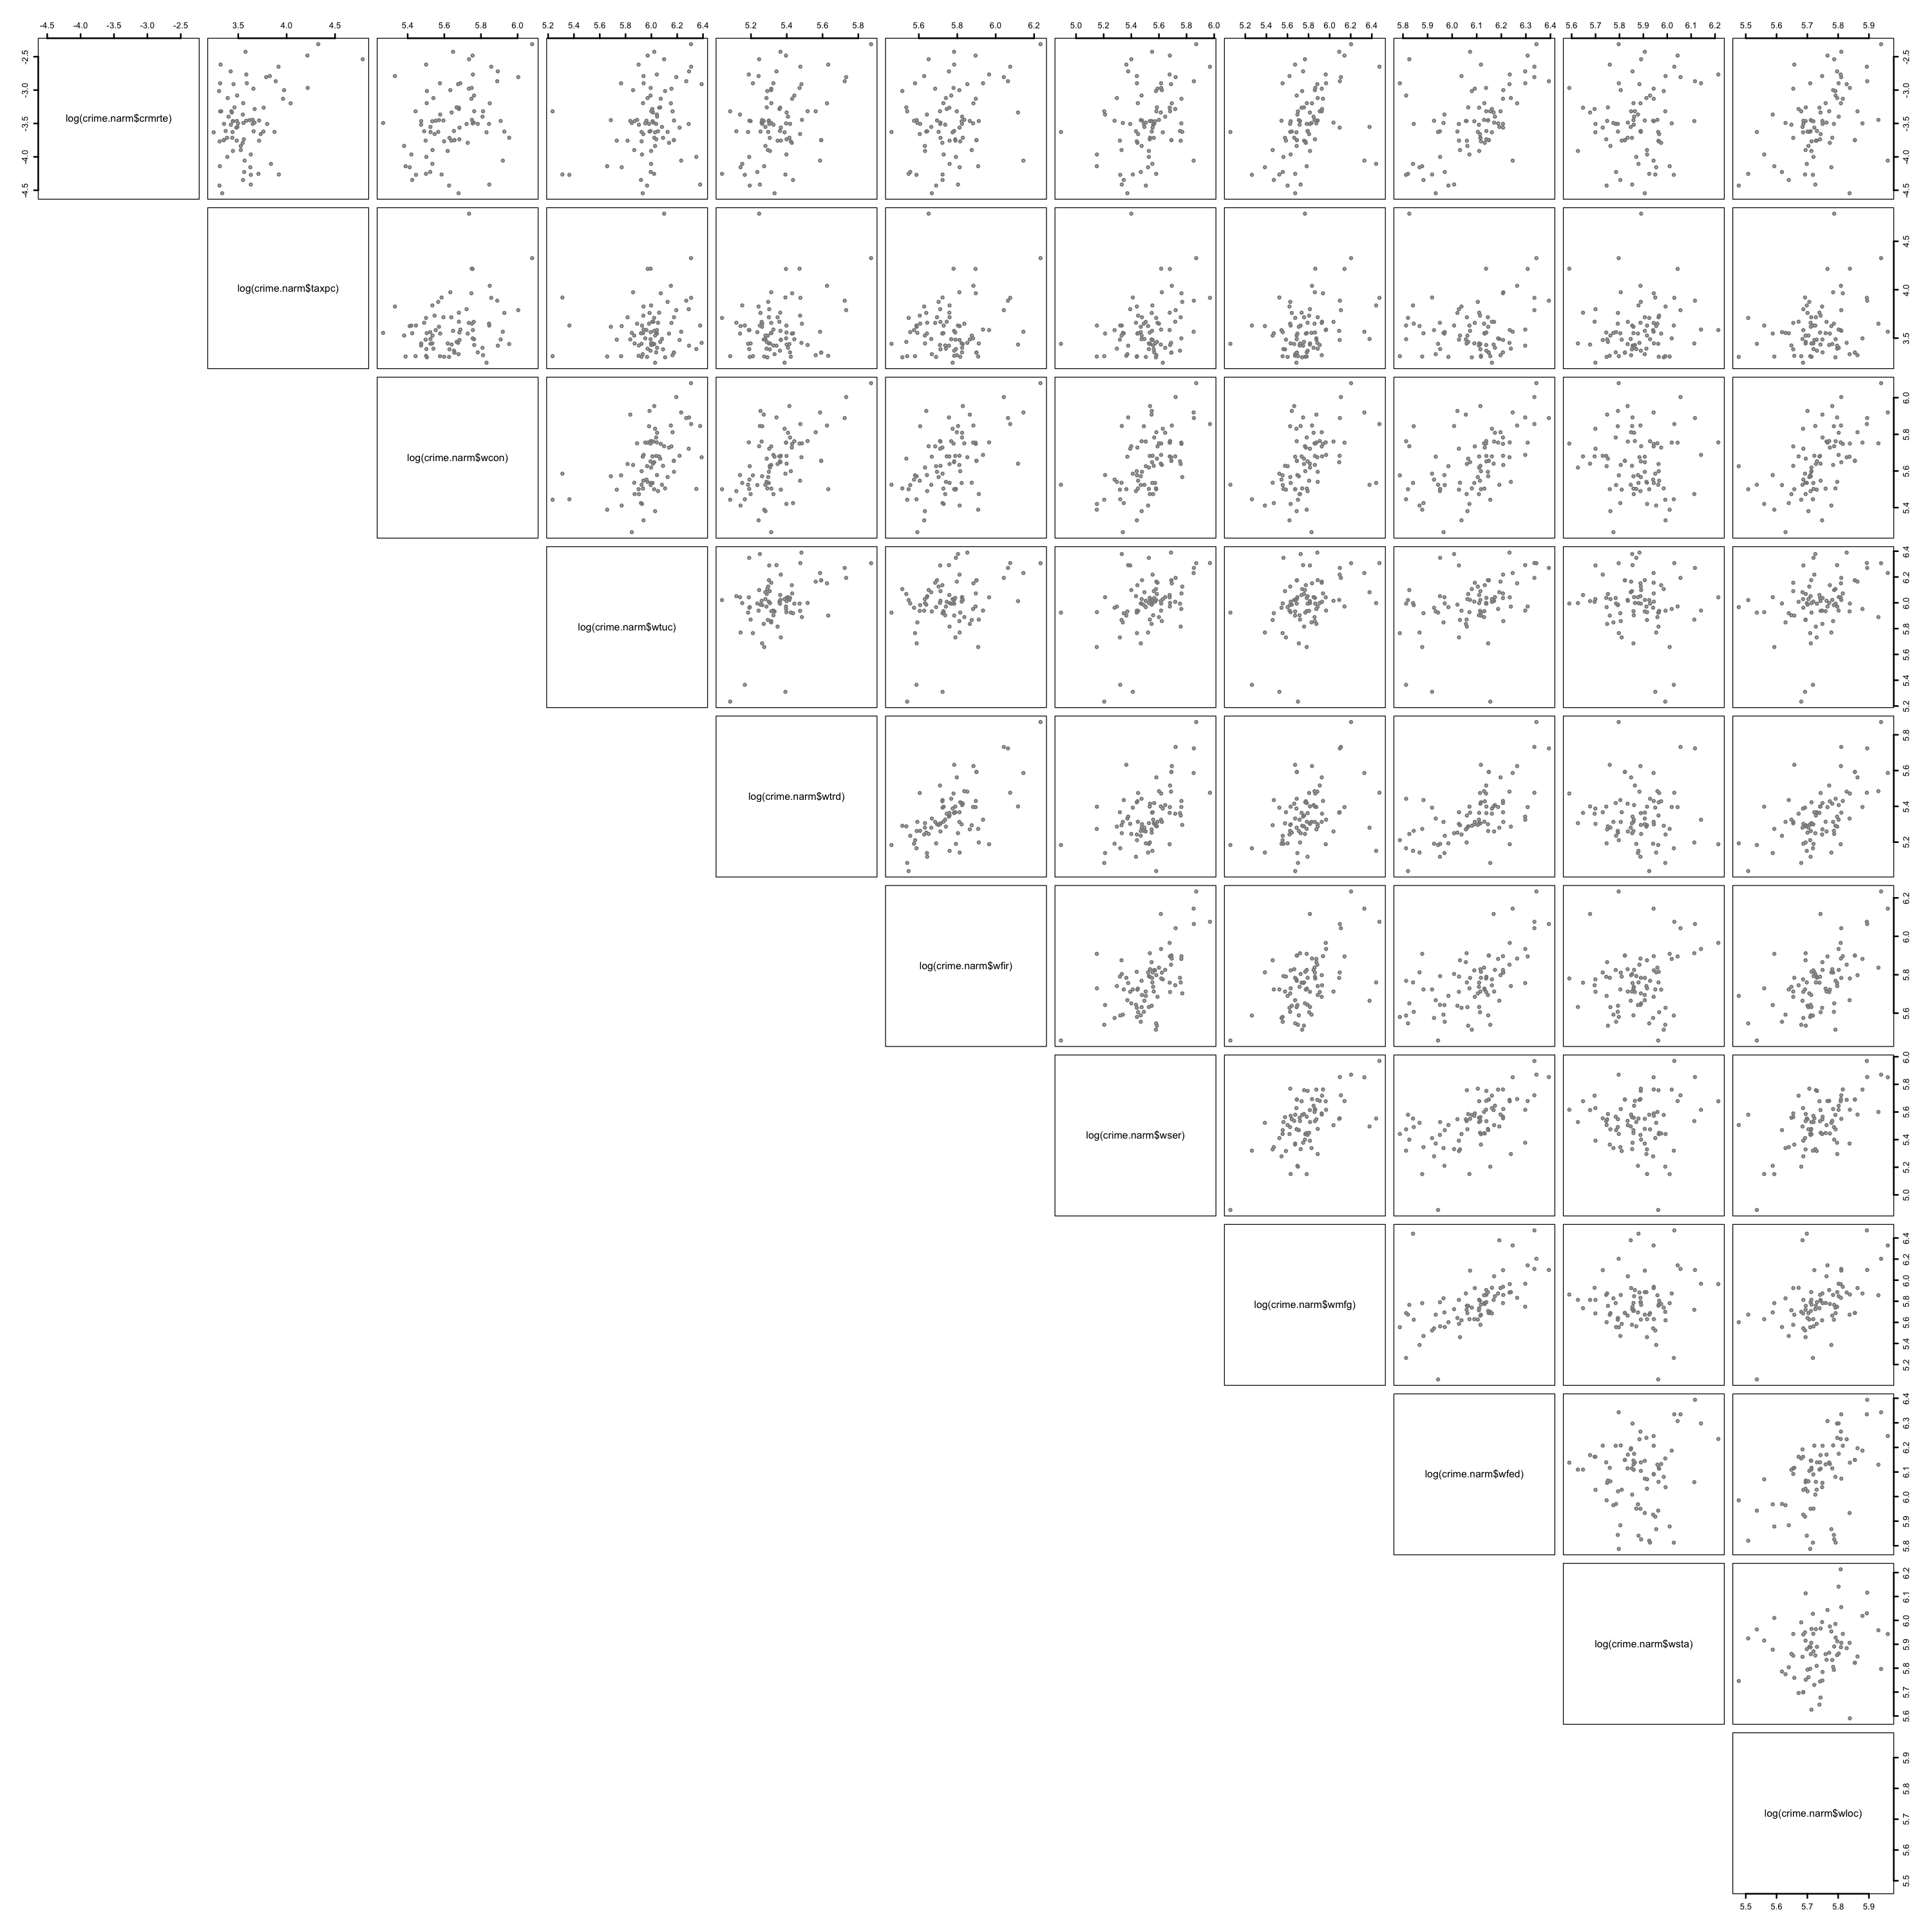

In [95]:
pairs(~log(crime.narm$crmrte) 
      + log(crime.narm$taxpc)
      + log(crime.narm$wcon)
      + log(crime.narm$wtuc)
      + log(crime.narm$wtrd)
      + log(crime.narm$wfir)
      + log(crime.narm$wser)
      + log(crime.narm$wmfg)
      + log(crime.narm$wfed)
      + log(crime.narm$wsta)
      + log(crime.narm$wloc),
      cex.labels=1.2, lower.panel = NULL,
      pch=1,cex=0.8,lwd=2,col="grey55")
options(repr.plot.height = 25, repr.plot.width = 25, repr.plot.pointsize = 10)

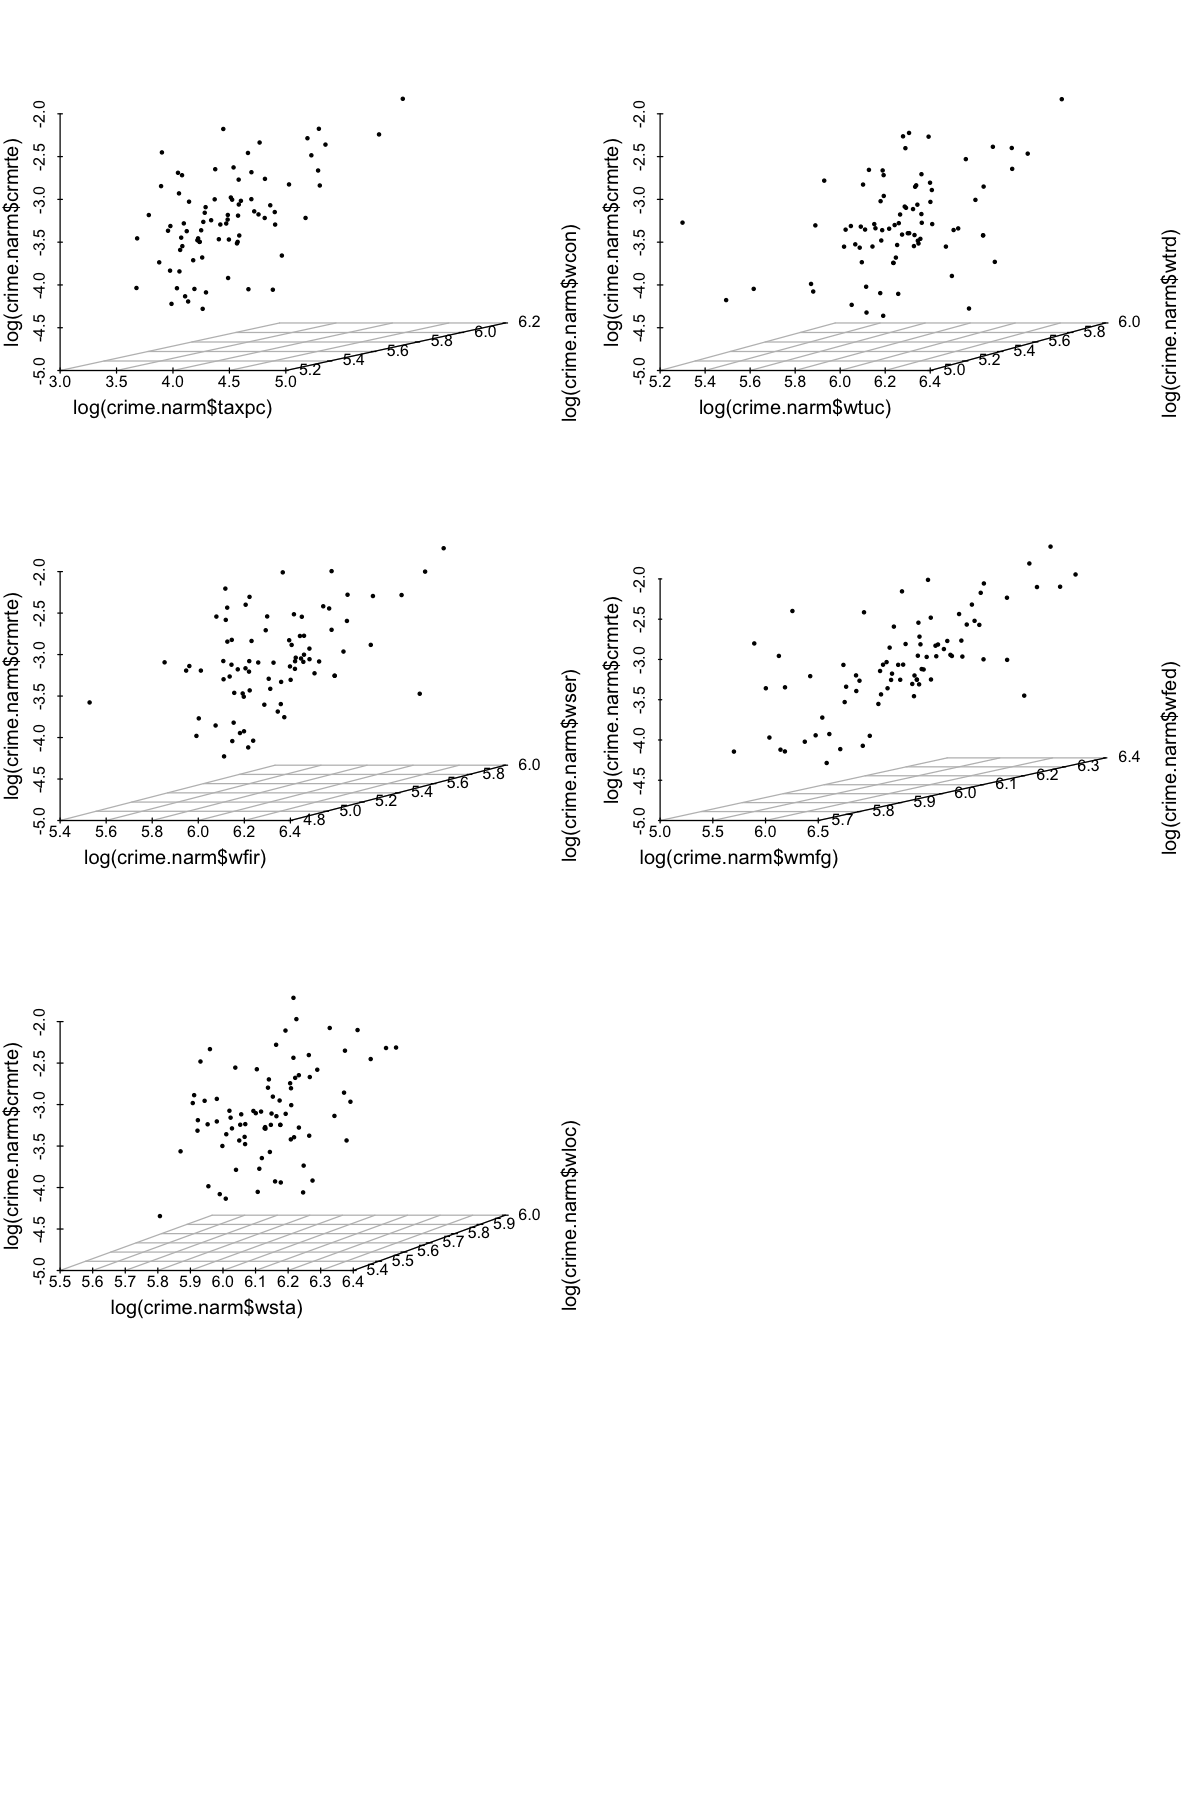

In [79]:
par(mfrow=c(4,2))
scatterplot3d(log(crime.narm$taxpc),
              log(crime.narm$wcon),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(log(crime.narm$wtuc),
              log(crime.narm$wtrd),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(log(crime.narm$wfir),
              log(crime.narm$wser),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(log(crime.narm$wmfg),
              log(crime.narm$wfed),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(log(crime.narm$wsta),
              log(crime.narm$wloc),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
options(repr.plot.height = 15, repr.plot.width = 10, repr.plot.pointsize = 10)

Crime and probabilities to commit crime, be arrested, and sentence lengths

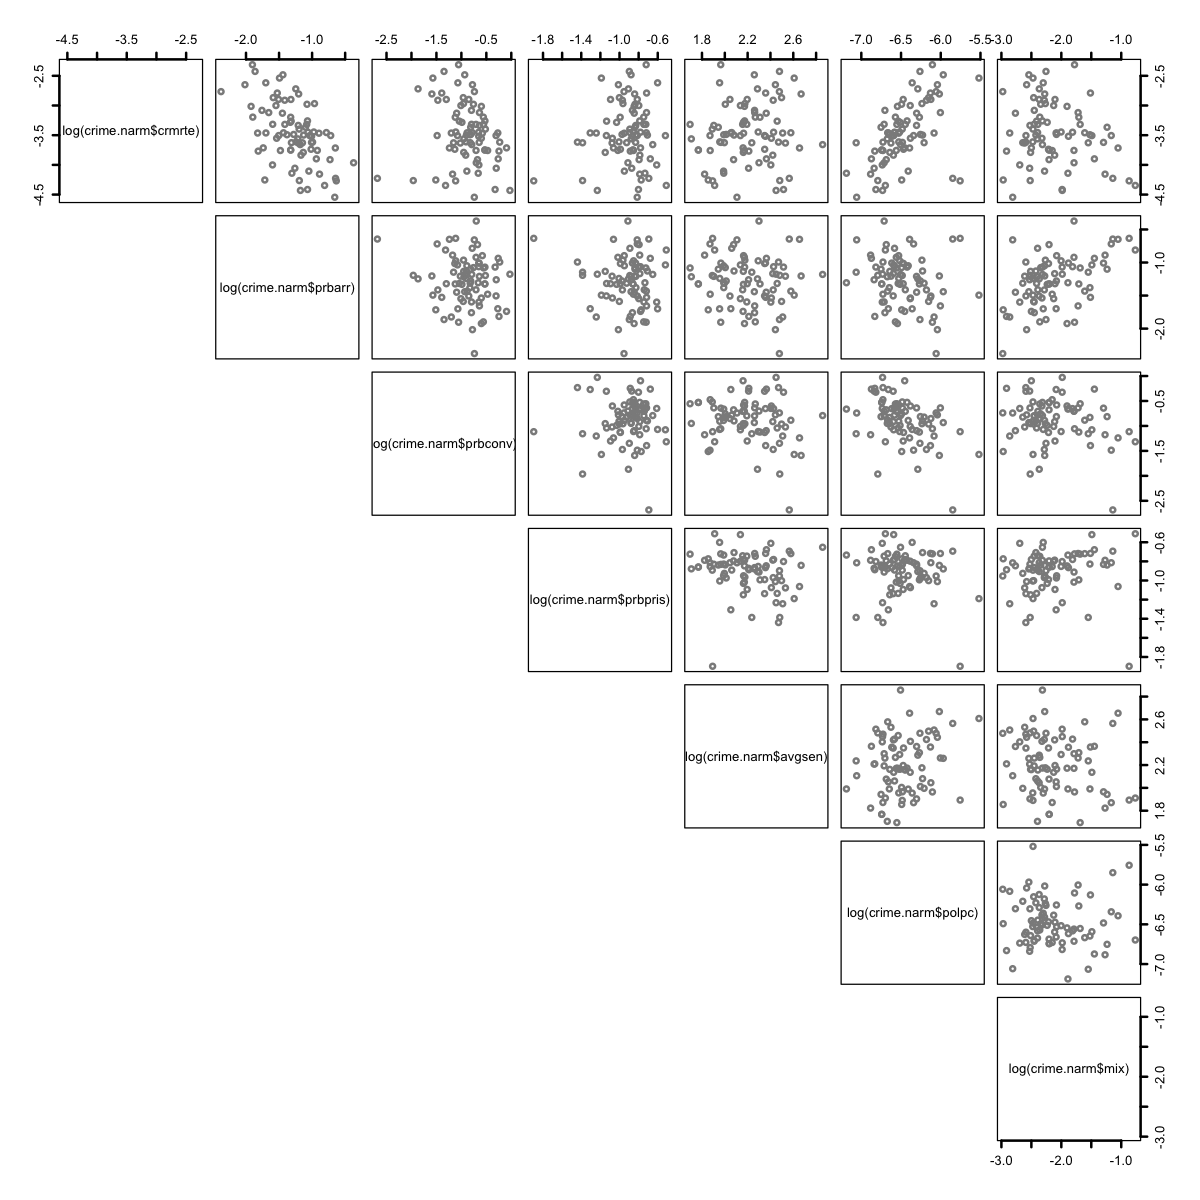

In [81]:
pairs(~log(crime.narm$crmrte)
      + log(crime.narm$prbarr)
      + log(crime.narm$prbconv)
      + log(crime.narm$prbpris)
      + log(crime.narm$avgsen)
      + log(crime.narm$polpc)
      + log(crime.narm$mix),
      cex.labels=1, lower.panel = NULL,
      pch=1,cex=1,lwd=2,col="grey55")
options(repr.plot.height = 25, repr.plot.width = 25, repr.plot.pointsize = 10)

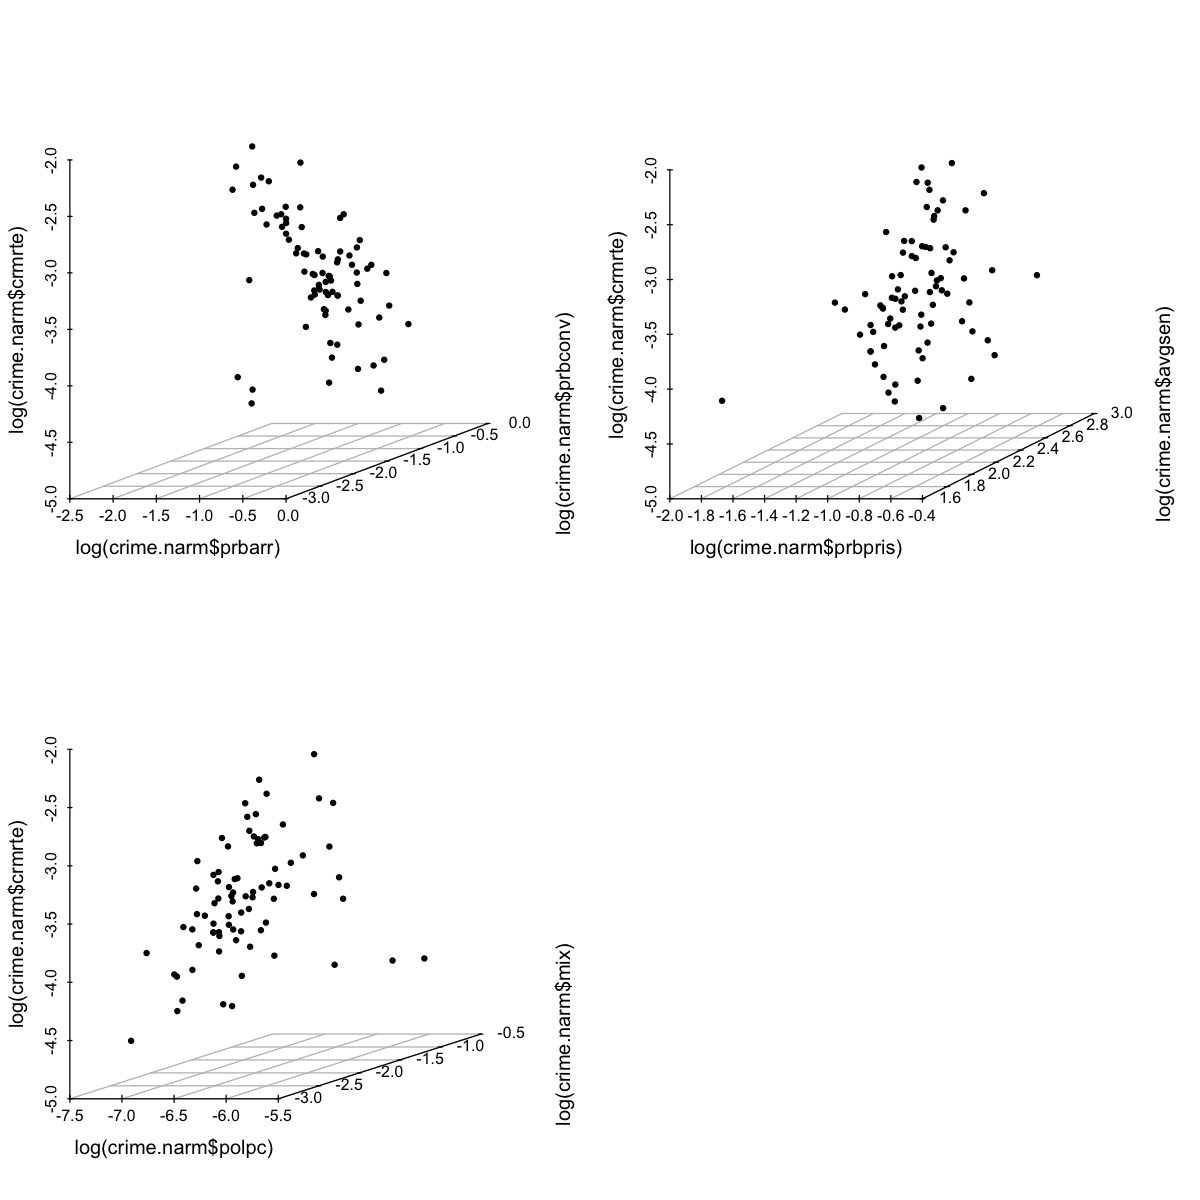

In [105]:
par(mfrow=c(2,2))
scatterplot3d(log(crime.narm$prbarr),
              log(crime.narm$prbconv),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(log(crime.narm$prbpris),
              log(crime.narm$avgsen),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
scatterplot3d(log(crime.narm$polpc),
              log(crime.narm$mix),
              log(crime.narm$crmrte),
              pch = 19,
              color="black",
              angle = 20,
              box=FALSE)
options(repr.plot.height = 10, repr.plot.width = 10, repr.plot.pointsize = 10)

All $relevant$ variables

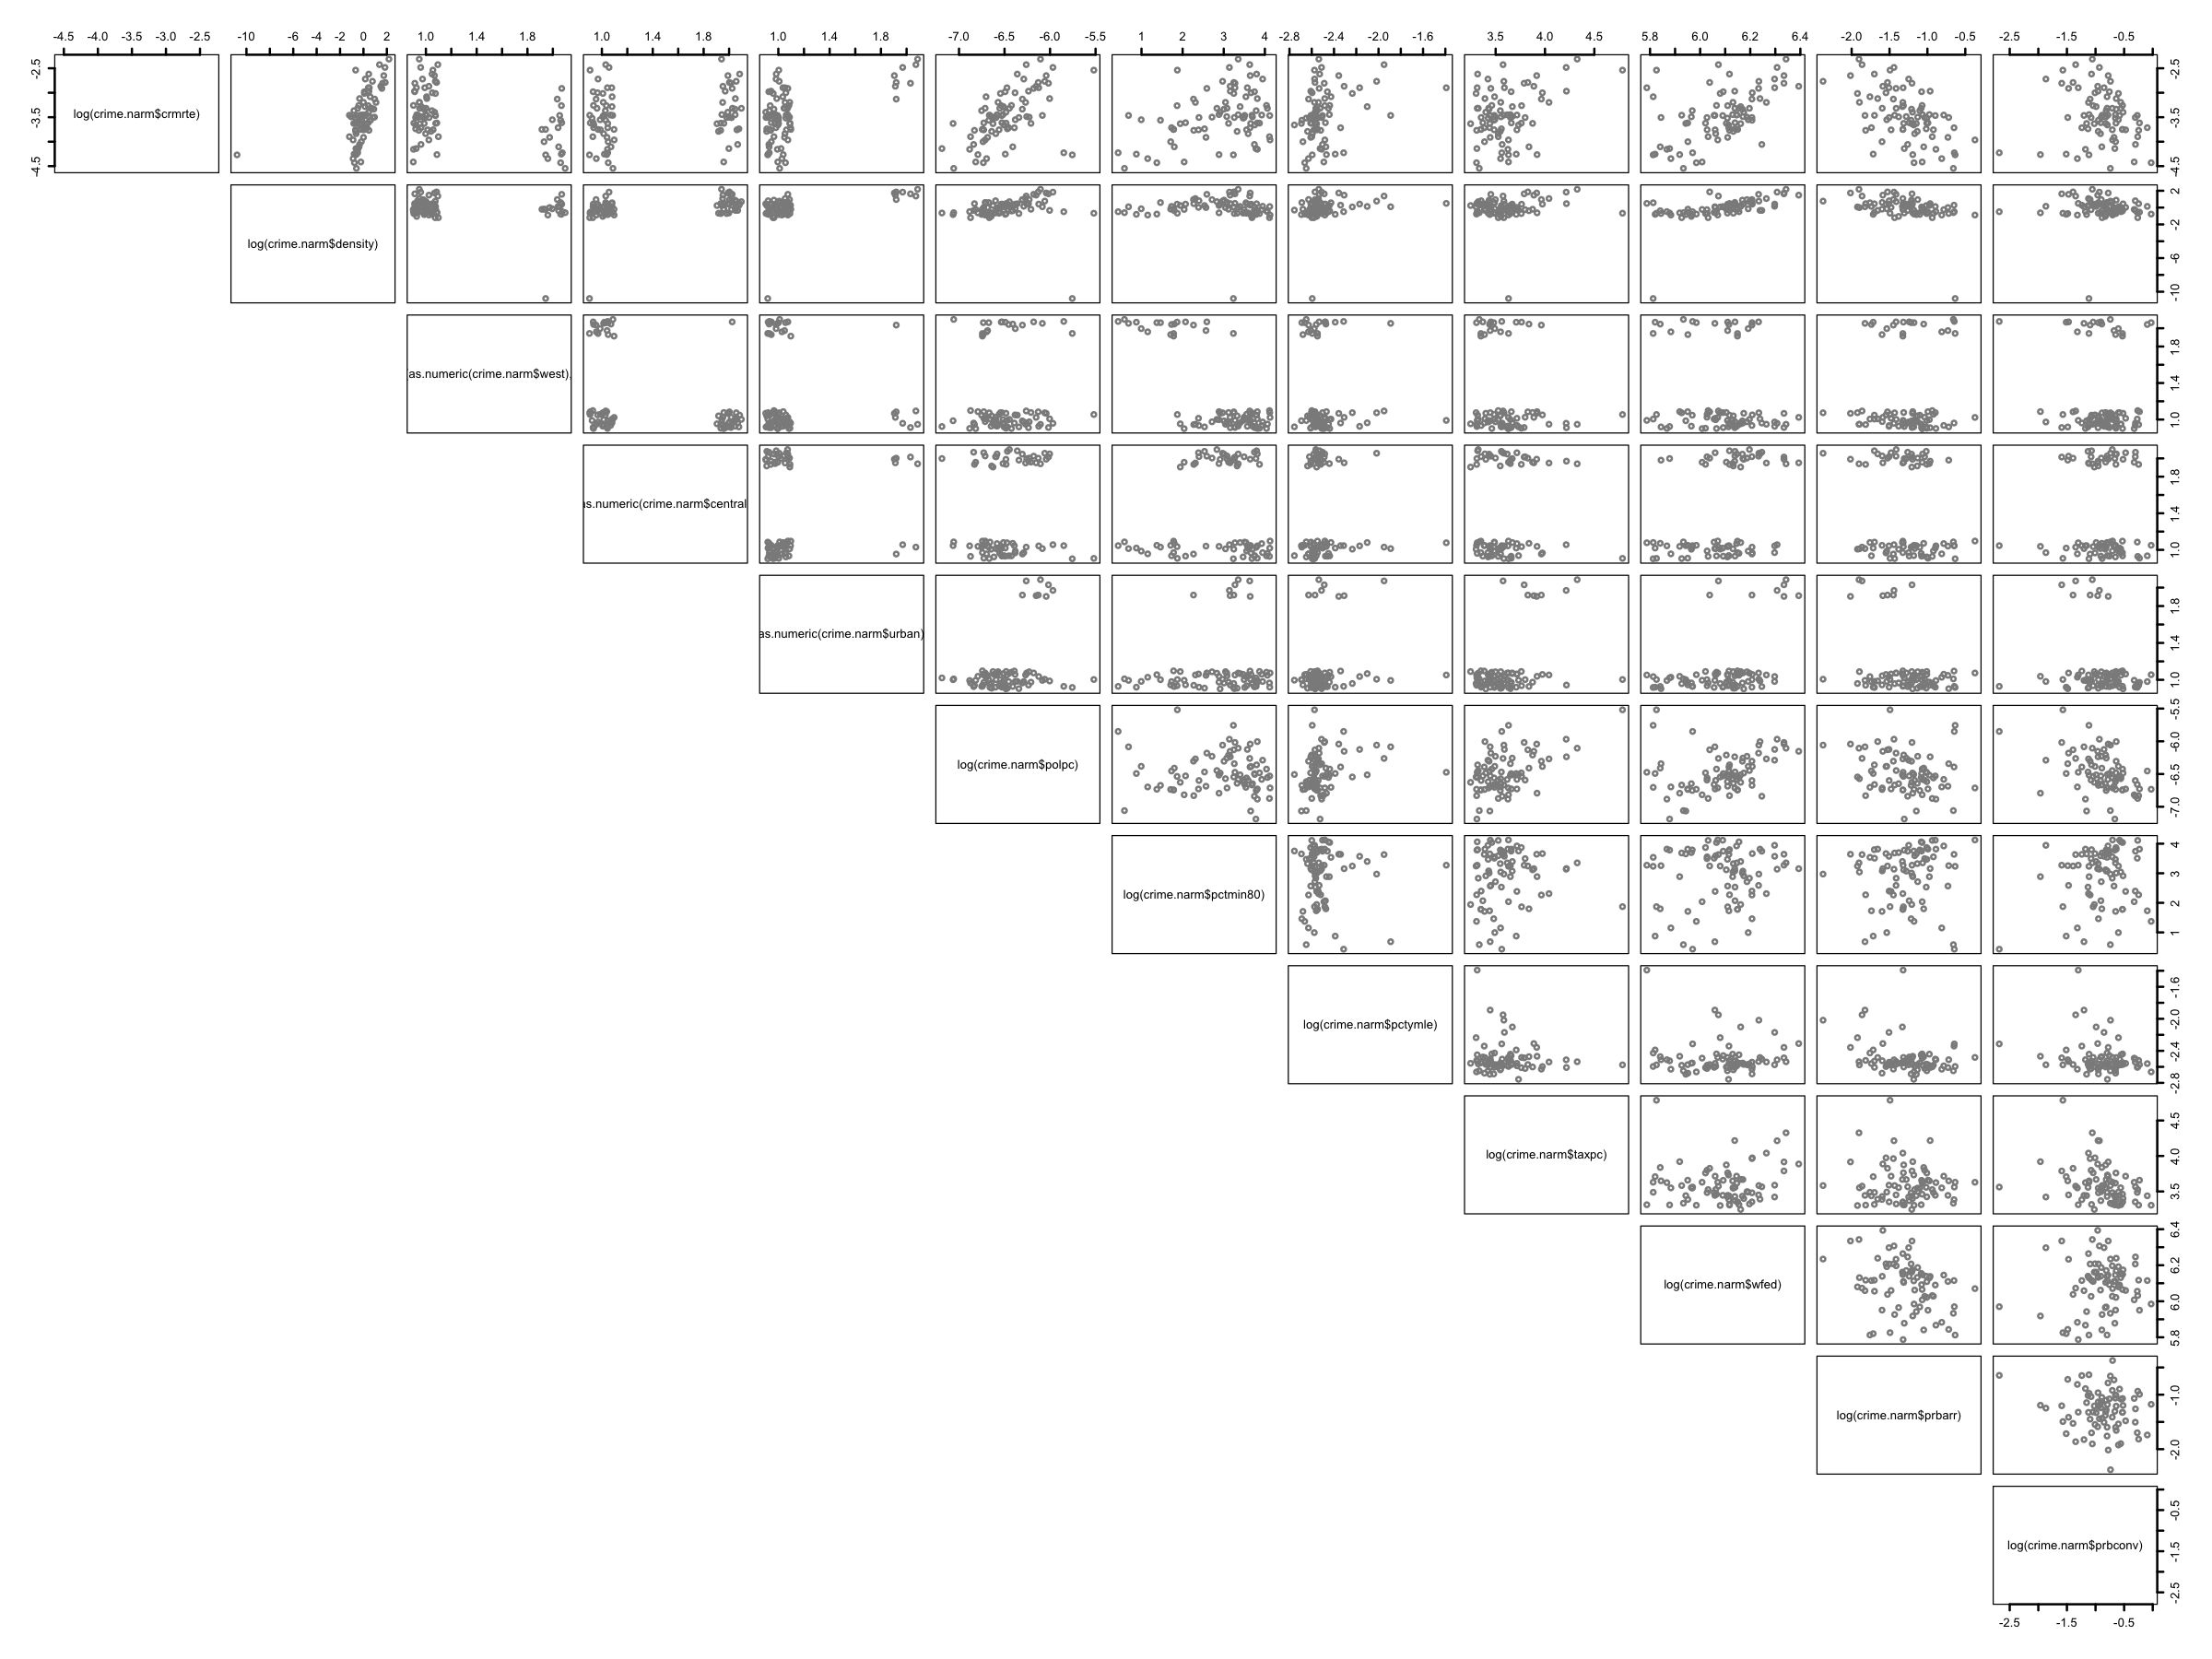

In [107]:
pairs(~log(crime.narm$crmrte)
      + log(crime.narm$density)
      + jitter(as.numeric(crime.narm$west),0.5)
      + jitter(as.numeric(crime.narm$central),0.5)
      + jitter(as.numeric(crime.narm$urban),0.5)
      + log(crime.narm$polpc)
      + log(crime.narm$pctmin80)
      + log(crime.narm$pctymle)
      + log(crime.narm$taxpc)
      + log(crime.narm$wfed)
      + log(crime.narm$prbarr)
      + log(crime.narm$prbconv),
      cex.labels=1, lower.panel = NULL,
      pch=1,cex=1,lwd=2,col="grey55")
options(repr.plot.height = 25, repr.plot.width = 25, repr.plot.pointsize = 10)

### Diagnostics<a class="anchor" id="eighth-q"></a>  
[Back to Table of Contents](#toc-q)

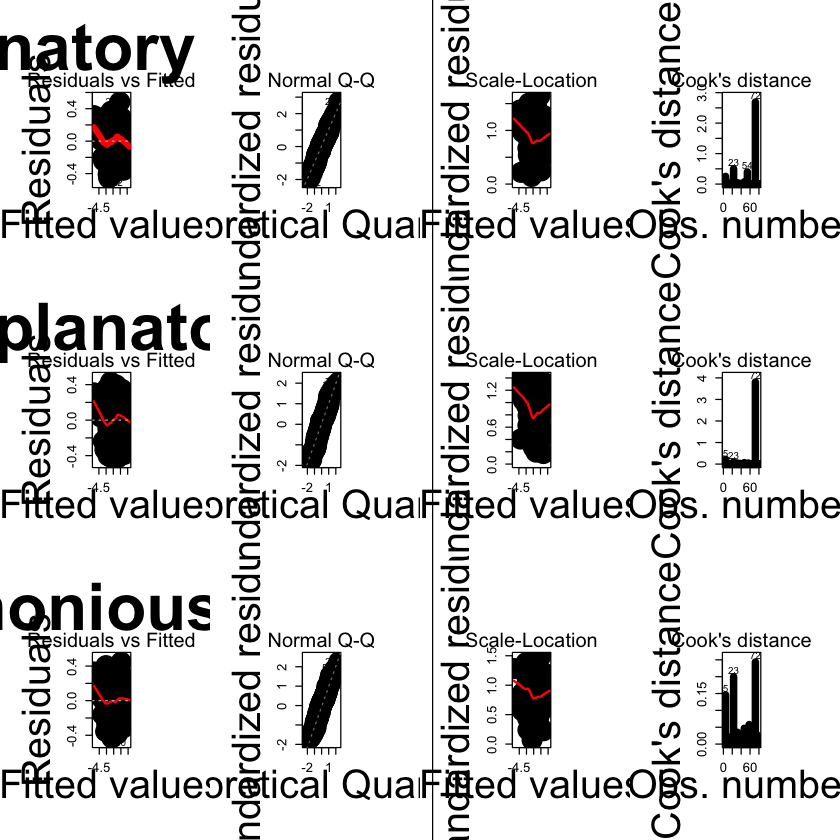

In [20]:
par(mfrow = c(3,4),mar=c(7,7,7,6))
plot(m_all, which=1, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=5, main="All explanatory variables")
plot(m_all, which=2, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=2)
plot(m_all, which=3, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=2)
plot(m_all, which=4, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=6)

plot(m_key, which=1, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=2, main="Only key explanatory variables")
plot(m_key, which=2, pch=19, cex=4, cex.lab=3, cex.main=5,lwd=2)
plot(m_key, which=3, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=2)
plot(m_key, which=4, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=6)

plot(m_simple, which=1, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=2, main="Parsimonious model")
plot(m_simple, which=2, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=2)
plot(m_simple, which=3, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=2)
plot(m_simple, which=4, pch=19, cex=4, cex.lab=3, cex.main=5, lwd=6)

options(repr.plot.height = 35, repr.plot.width = 35, repr.plot.pointsize = 10)

### Inferential analysis<a class="anchor" id="ninth-q"></a>  
[Back to Table of Contents](#toc-q)

**The explanatory key variables of interest**

<img src="lab3_steps.png">

**One model that includes the previous covariates, and most, if not all, other covariates. A key purpose of this model is to demonstrate the robustness of your results to model specification.**

In [25]:
m_all <- lm(log(crime.narm$crmrte) ~ log(crime.narm$density) + log(crime.narm$polpc) +
            log(crime.narm$wfed) + log(crime.narm$prbarr) + log(crime.narm$prbconv) +
            factor(crime.narm$west) + factor(crime.narm$urban)+ log(crime.narm$pctmin80) +
            log(crime.narm$pctymle))

**One model that includes key explanatory variables and only covariates that you believe increase the accuracy of your results without introducing substantial bias (for example, you should not include outcome variables that will absorb some of the causal effect you are interested in). This model should strike a balance between accuracy and parsimony and reflect your best understanding of the determinants of crime.**

In [26]:
m_key <- lm(log(crime.narm$crmrte) ~ log(crime.narm$density) + log(crime.narm$polpc)
         + log(crime.narm$prbarr) + log(crime.narm$pctmin80))

**One model with only the explanatory variables of key interest (possibly transformed, as determined by your EDA), and no other covariates.**

In [27]:
# This could be improved
m_simple =(lm(log(crmrte) ~ log(prbarr) + log(pctmin80) + 
              log(density) * log(polpc), data = crime.narm))

**Regression table without standard errors**

In [30]:
stargazer(m_all, 
          m_key,
          m_simple,
          type="text",
          keep.stat=c("n", "adj.rsq"),
          star.cutoffs = c(0.05, 0.01, 0.001))


                              Dependent variable:      
                        -------------------------------
                              crmrte)       log(crmrte)
                           (1)       (2)        (3)    
-------------------------------------------------------
density)                0.129***  0.133***             
                         (0.027)   (0.020)             
                                                       
polpc)                  0.777***  0.862***             
                         (0.123)   (0.088)             
                                                       
wfed)                     0.108                        
                         (0.266)                       
                                                       
prbarr)                 -0.434*** -0.417***            
                         (0.089)   (0.078)             
                                                       
prbconv)                 -0.070                

### Interpretation<a class="anchor" id="tenth-q"></a>  
[Back to Table of Contents](#toc-q)

$\star$ Discussion on 5-10 ommitted variables that may introduce bias. 
   * Estimate direction of bias (towards or away from 0) and, if possible, the size.
   * Identify candidate surrogates for omitted variables.
   * Synthesize findings to determine if effects are real or artifacts of ommitted variable bias.

**Conclusion**

### Resources<a class="anchor" id="eleventh-q"></a>  
[Back to Table of Contents](#toc-q)

### Appendix<a class="anchor" id="twelvth-q"></a>  
[Back to Table of Contents](#toc-q)

**Does population density, tax revenue, and police force affect crime rate?**
* Population, goverment income

In [167]:
# the explanatory variables of key interest
mp1 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$density))
mp2 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$polpc))
mp3 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$taxpc))
mp4 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$density) + log(crime.narm$polpc))
mp5 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$density) + log(crime.narm$taxpc))
mp6 <- lm(log(crime.narm$crmrte) ~  log(crime.narm$polpc) + log(crime.narm$taxpc))
mp7 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$density) + log(crime.narm$polpc) + log(crime.narm$taxpc))
stargazer(mp1,mp2,mp3,mp4,mp5,mp6,mp7, type="text", keep.stat=c("n", "adj.rsq"), star.cutoffs = c(0.05, 0.01, 0.001))


                                    Dependent variable:                       
             -----------------------------------------------------------------
                                          crmrte)                             
                (1)      (2)       (3)      (4)       (5)      (6)      (7)   
------------------------------------------------------------------------------
density)     0.178***                     0.170*** 0.165***           0.169***
              (0.034)                     (0.027)   (0.033)           (0.027) 
                                                                              
polpc)                 0.964***           0.931***           0.876*** 0.900***
                       (0.157)            (0.128)            (0.182)  (0.149) 
                                                                              
taxpc)                          0.703***            0.595**   0.196    0.071  
                                 (0.202)           

ERROR: Error in chart.Correlation(crime.narm[, c("density", "polpc", "taxpc")], : could not find function "chart.Correlation"


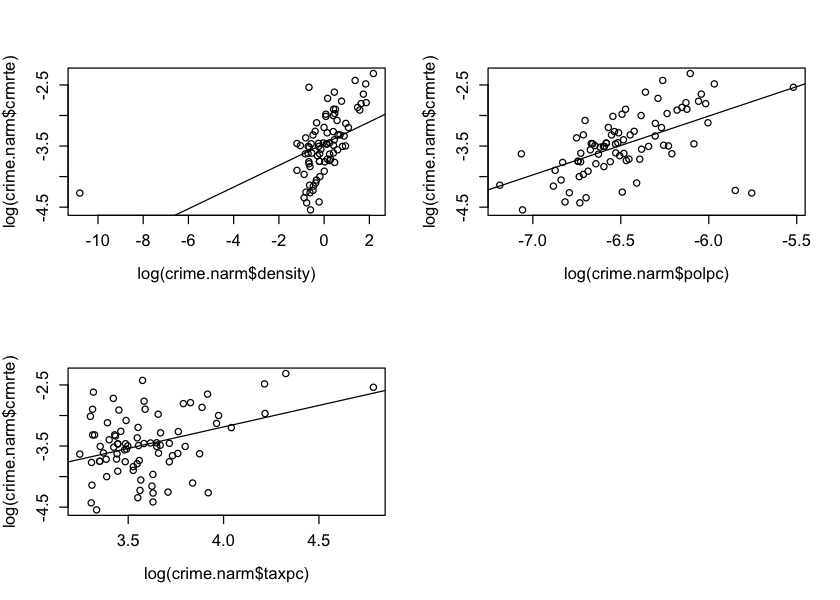

In [168]:
options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(log(crime.narm$density), log(crime.narm$crmrte))
abline(mp1)
plot(log(crime.narm$polpc), log(crime.narm$crmrte))
abline(mp2)
plot(log(crime.narm$taxpc), log(crime.narm$crmrte))
abline(mp3)
chart.Correlation(crime.narm[,c("density", "polpc", "taxpc")], method = c("pearson"))

**Does income affect crime rate?**
* Employee incomes

In [14]:
me1  <- lm(log(crime.narm$crmrte) ~ log(crime.narm$wcon))
me2  <- lm(log(crime.narm$crmrte) ~ log(crime.narm$wtuc))
me3  <- lm(log(crime.narm$crmrte) ~ log(crime.narm$wtrd))
me4  <- lm(log(crime.narm$crmrte) ~ log(crime.narm$wfir))
me5  <- lm(log(crime.narm$crmrte) ~ log(crime.narm$wser))
me6  <- lm(log(crime.narm$crmrte) ~ log(crime.narm$wmfg))
me7  <- lm(log(crime.narm$crmrte) ~ log(crime.narm$wfed))
me8  <- lm(log(crime.narm$crmrte) ~ log(crime.narm$wsta))
me9  <- lm(log(crime.narm$crmrte) ~ log(crime.narm$wloc))
me10 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$wcon) + log(crime.narm$wtuc) + log(crime.narm$wtrd) +
         log(crime.narm$wfir) + log(crime.narm$wser) + log(crime.narm$wmfg) + log(crime.narm$wfed) +
         log(crime.narm$wsta) + log(crime.narm$wloc))
stargazer(me1,me2,me3,me4,me5,me6,me7,me8,me9,me10, type="text", keep.stat=c("n", "adj.rsq"), 
          star.cutoffs = c(0.05, 0.01, 0.001))


                                                     Dependent variable:                                         
             ----------------------------------------------------------------------------------------------------
                                                           crmrte)                                               
                (1)       (2)       (3)       (4)       (5)       (6)       (7)       (8)      (9)        (10)   
-----------------------------------------------------------------------------------------------------------------
wcon)         1.046**                                                                                    0.190   
              (0.328)                                                                                   (0.422)  
                                                                                                                 
wtuc)                   0.642*                                                         

ERROR: Error in chart.Correlation(crime.narm[, c("wcon", "wtuc", "wtrd", "wfir", : could not find function "chart.Correlation"


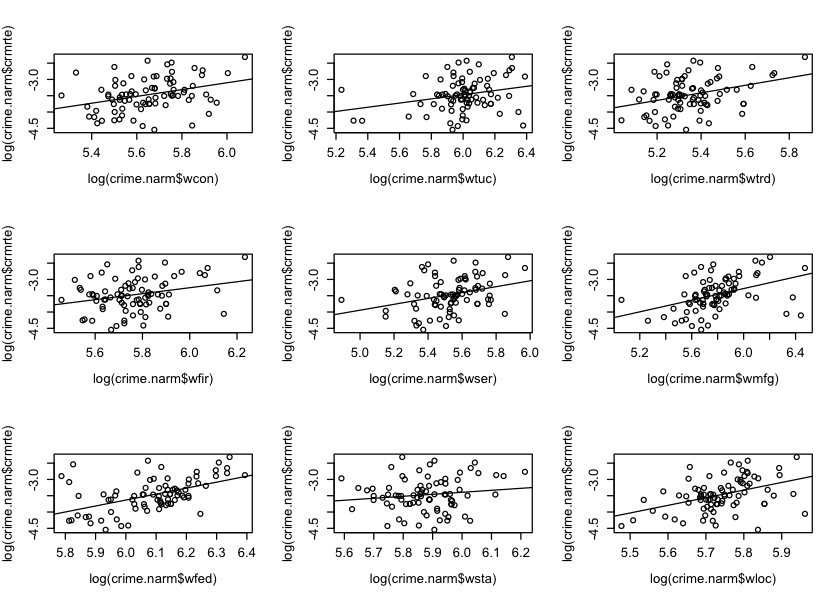

In [15]:
options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(3,3))
plot(log(crime.narm$wcon), log(crime.narm$crmrte))
abline(me1)
plot(log(crime.narm$wtuc), log(crime.narm$crmrte))
abline(me2)
plot(log(crime.narm$wtrd), log(crime.narm$crmrte))
abline(me3)
plot(log(crime.narm$wfir), log(crime.narm$crmrte))
abline(me4)
plot(log(crime.narm$wser), log(crime.narm$crmrte))
abline(me5)
plot(log(crime.narm$wmfg), log(crime.narm$crmrte))
abline(me6)
plot(log(crime.narm$wfed), log(crime.narm$crmrte))
abline(me7)
plot(log(crime.narm$wsta), log(crime.narm$crmrte))
abline(me8)
plot(log(crime.narm$wloc), log(crime.narm$crmrte))
abline(me9)
chart.Correlation(crime.narm[,c("wcon", "wtuc", "wtrd", "wfir", "wser", "wmfg",
                               "wfed", "wsta", "wloc")], method = c("pearson"))

**Do young males and the percent of population that is minority affect crime rate?**
* minority and young male

In [16]:
mm1 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$pctmin80))
mm2 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$pctymle))
mm3 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$pctmin80) + log(crime.narm$pctymle))
stargazer(mm1,mm2,mm3, type="text", keep.stat=c("n", "adj.rsq"), star.cutoffs = c(0.05, 0.01, 0.001))


                   Dependent variable:      
             -------------------------------
                         crmrte)            
                 (1)        (2)       (3)   
--------------------------------------------
pctmin80)     0.201***             0.200*** 
               (0.056)              (0.053) 
                                            
pctymle)                  0.803**   0.798** 
                          (0.273)   (0.252) 
                                            
Constant      -4.058***   -1.467*  -2.065** 
               (0.173)    (0.682)   (0.651) 
                                            
--------------------------------------------
Observations     81         81        81    
Adjusted R2     0.129      0.087     0.218  
Note:          *p<0.05; **p<0.01; ***p<0.001


ERROR: Error in chart.Correlation(crime.narm[, c("pctmin80", "pctymle")], method = c("pearson")): could not find function "chart.Correlation"


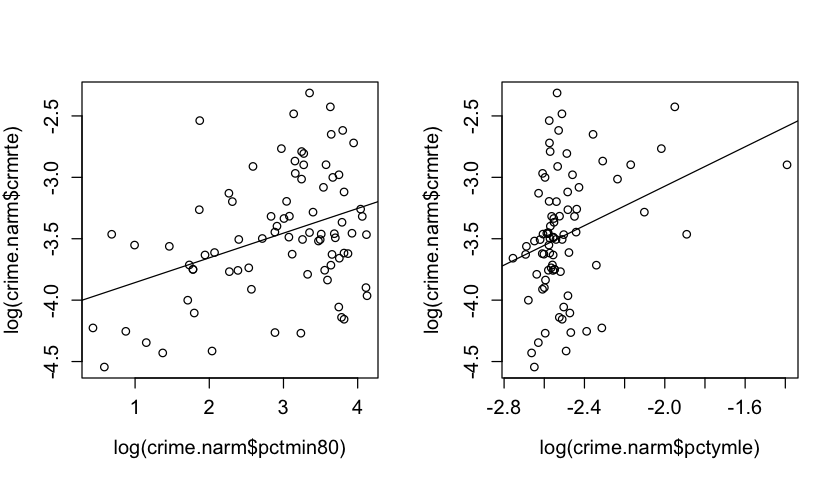

In [17]:
options(repr.plot.height = 4, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(1,2))
plot(log(crime.narm$pctmin80), log(crime.narm$crmrte))
abline(mm1)
plot(log(crime.narm$pctymle), log(crime.narm$crmrte))
abline(mm2)
chart.Correlation(crime.narm[,c("pctmin80", "pctymle")], method = c("pearson"))

**Does geographic location affect crime rate?**
* geographic factors

In [18]:
mg1 <- lm(log(crime.narm$crmrte) ~ factor(crime.narm$west))
mg2 <- lm(log(crime.narm$crmrte) ~ factor(crime.narm$central))
mg3 <- lm(log(crime.narm$crmrte) ~ factor(crime.narm$urban))
mg4 <- lm(log(crime.narm$crmrte) ~ factor(crime.narm$west) + factor(crime.narm$central))
mg5 <- lm(log(crime.narm$crmrte) ~ factor(crime.narm$central) + factor(crime.narm$urban))
mg6 <- lm(log(crime.narm$crmrte) ~ factor(crime.narm$west) + factor(crime.narm$urban))
mg7 <- lm(log(crime.narm$crmrte) ~ factor(crime.narm$west) + factor(crime.narm$central) + factor(crime.narm$urban))
stargazer(mg1,mg2,mg3,mg4,mg5,mg6,mg7, type="text", keep.stat=c("n", "adj.rsq"), 
          star.cutoffs = c(0.05, 0.01, 0.001))


                                      Dependent variable:                         
             ---------------------------------------------------------------------
                                            crmrte)                               
                (1)       (2)       (3)       (4)       (5)       (6)       (7)   
----------------------------------------------------------------------------------
west)1       -0.473***                     -0.456**            -0.424*** -0.439***
              (0.122)                       (0.133)             (0.105)   (0.114) 
                                                                                  
central)1                0.191               0.038     0.111              -0.035  
                        (0.114)             (0.116)   (0.100)             (0.100) 
                                                                                  
urban)1                          0.872***            0.844***  0.821***  0.828*** 
   

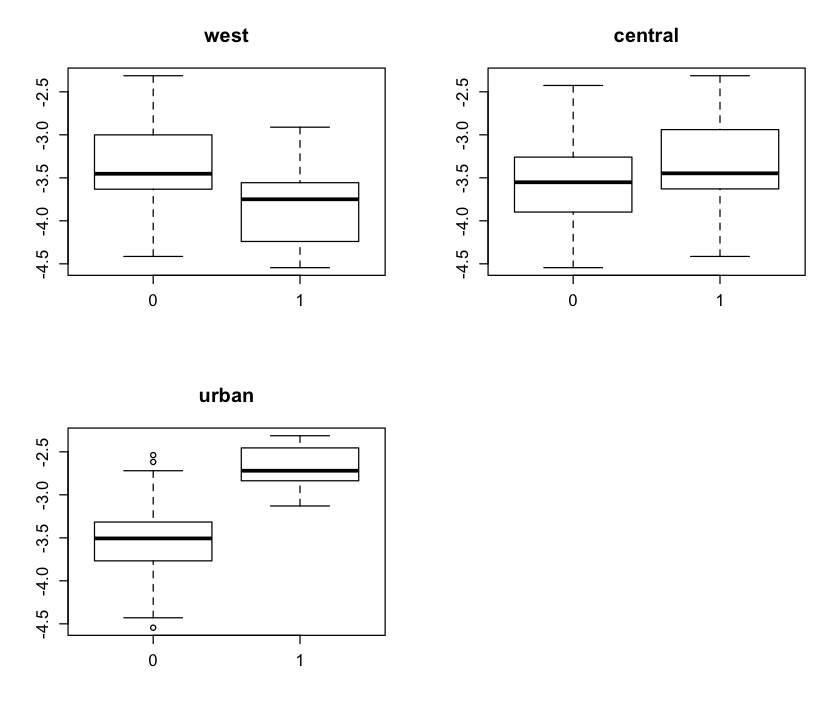

In [19]:
options(repr.plot.height = 6, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(factor(crime.narm$west), log(crime.narm$crmrte), main = "west")
plot(factor(crime.narm$central), log(crime.narm$crmrte), main = "central")
plot(factor(crime.narm$urban), log(crime.narm$crmrte), main = "urban")

**Do outcomes of crime affect crime rate?**
* crime outcomes

In [20]:
mc1 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$prbarr))
mc2 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$prbconv))
mc3 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$prbpris))
mc4 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$avgsen))
mc5 <- lm(log(crime.narm$crmrte) ~ log(crime.narm$prbarr) + log(crime.narm$prbconv) +
         log(crime.narm$prbpris) + log(crime.narm$avgsen))
stargazer(mc1,mc2,mc3,mc4,mc5,type="text", keep.stat=c("n", "adj.rsq"), star.cutoffs = c(0.05, 0.01, 0.001))


                            Dependent variable:               
             -------------------------------------------------
                                  crmrte)                     
                (1)       (2)       (3)       (4)       (5)   
--------------------------------------------------------------
prbarr)      -0.739***                               -0.772***
              (0.130)                                 (0.130) 
                                                              
prbconv)                -0.195                        -0.280* 
                        (0.130)                       (0.112) 
                                                              
prbpris)                           0.208               0.147  
                                  (0.262)             (0.219) 
                                                              
avgsen)                                      0.291     0.082  
                                            (0.225)   

ERROR: Error in chart.Correlation(crime.narm[, c("prbarr", "prbconv", "prbpris", : could not find function "chart.Correlation"


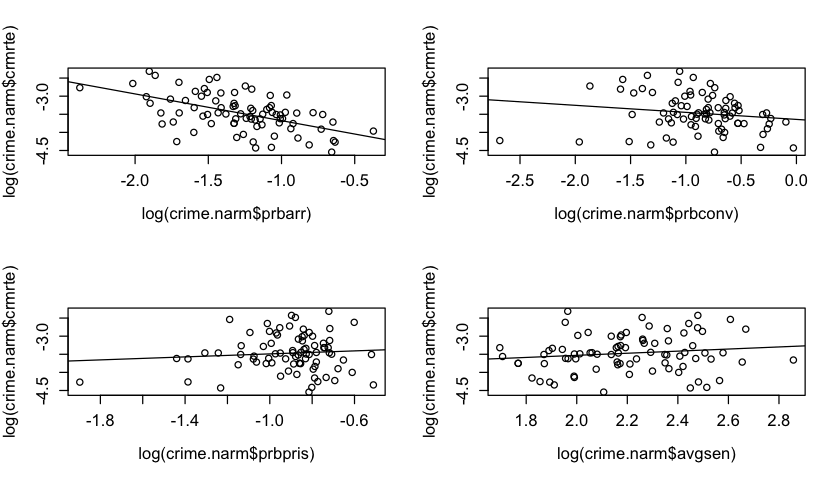

In [21]:
options(repr.plot.height = 4, repr.plot.width = 7, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(log(crime.narm$prbarr), log(crime.narm$crmrte))
abline(mc1)
plot(log(crime.narm$prbconv), log(crime.narm$crmrte))
abline(mc2)
plot(log(crime.narm$prbpris), log(crime.narm$crmrte))
abline(mc3)
plot(log(crime.narm$avgsen), log(crime.narm$crmrte))
abline(mc4)
chart.Correlation(crime.narm[,c("prbarr", "prbconv", "prbpris", "avgsen")], method = c("pearson"))